In [2]:
#NBA Player Stats (2024-25 Season) - Data Updated through 12/6/24

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('database_24_25.csv')

# Display the first few rows of the CSV data
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [128]:
df.info

<bound method DataFrame.info of                 Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA  ...  \
0         Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  ...   
1        Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  ...   
2        Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  ...   
3         Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  ...   
4        Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  ...   
...                ...  ...  ...  ..    ...  ..  ...    ...  ..  ...  ...   
7216  Precious Achiuwa  NYK  CHO   W  12.25   1    4  0.250   0    1  ...   
7217      Jericho Sims  NYK  CHO   W   3.37   0    1  0.000   0    0  ...   
7218      Chris Duarte  CHI  SAS   W   4.27   0    1  0.000   0    1  ...   
7219       Jamal Shead  TOR  OKC   L  11.90   0    4  0.000   0    4  ...   
7220        KJ Simpson  CHO  NYK   L  17.03   0    4  0.000   0    2  ...   

      DRB  TRB  AST  STL  BLK  TOV  PF  PTS

In [5]:
# Check for missing values
df.isnull().sum()

Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64

In [6]:
df.shape

(7221, 25)

In [7]:
df.describe()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000
mean,22.193191,3.778978,8.147486,0.425915,1.236117,3.445091,0.264501,1.588007,2.045008,0.420428,1.002770,3.033513,4.036283,2.394959,0.767345,0.475557,1.291095,1.784794,10.382080,8.391317
std,10.950661,3.225574,6.026257,0.258730,1.529055,3.162310,0.290227,2.242171,2.721525,0.435381,1.348126,2.686168,3.411373,2.607192,0.989217,0.834417,1.444836,1.462437,8.788708,7.764807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,14.080000,1.000000,3.000000,0.273000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.200000
50%,23.300000,3.000000,7.000000,0.444000,1.000000,3.000000,0.222000,1.000000,1.000000,0.400000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,8.000000,6.900000
75%,31.220000,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,13.000000
max,47.780000,22.000000,38.000000,1.000000,10.000000,20.000000,1.000000,17.000000,26.000000,1.000000,12.000000,17.000000,22.000000,22.000000,7.000000,9.000000,10.000000,6.000000,60.000000,54.200000


In [8]:
df.describe(include='object')

,Player,Tm,Opp,Res,Data
count,7221,7221,7221,7221,7221
unique,496,30,30,2,43
top,Anthony Black,ORL,MEM,L,2024-11-04
freq,24,284,270,3619,312


In [9]:
df.groupby(['Tm','Player']).count()

Opp  Res  MP  FG  FGA  FG%  3P  3PA  3P%  FT  ...  DRB  \
Tm  Player                                                           ...        
ATL Bogdan Bogdanović    9    9   9   9    9    9   9    9    9   9  ...    9   
    Clint Capela        23   23  23  23   23   23  23   23   23  23  ...   23   
    David Roddy         13   13  13  13   13   13  13   13   13  13  ...   13   
    De'Andre Hunter     12   12  12  12   12   12  12   12   12  12  ...   12   
    Dominick Barlow      2    2   2   2    2    2   2    2    2   2  ...    2   
...                    ...  ...  ..  ..  ...  ...  ..  ...  ...  ..  ...  ...   
WAS Kyshawn George      19   19  19  19   19   19  19   19   19  19  ...   19   
    Malcolm Brogdon      9    9   9   9    9    9   9    9    9   9  ...    9   
    Marvin Bagley       14   14  14  14   14   14  14   14   14  14  ...   14   
    Patrick Baldwin     11   11  11  11   11   11  11   11   11  11  ...   11   
    Richaun Holmes       3    3   3   3    3    3   3    3    3   3  ...    3   

                       TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  Data  
Tm  Player                                                           
ATL Bogdan Bogdanović    9    9    9    9    9   9    9     9     9  
    Clint Capela        23   23   23   23   23  23   23    23    23  
    David Roddy         13   13   13   13   13  13   13    13    13  
    De'Andre Hunter     12   12   12   12   12  12   12    12    12  
    Dominick Barlow      2    2    2    2    2   2    2     2     2  
...                    ...  ...  ...  ...  ...  ..  ...   ...   ...  
WAS Kyshawn George      19   19   19   19   19  19   19    19    19  
    Malcolm Brogdon      9    9    9    9    9   9    9     9     9  
    Marvin Bagley       14   14   14   14   14  14   14    14    14  
    Patrick Baldwin     11   11   11   11   11  11   11    11    11  
    Richaun Holmes       3    3    3    3    3   3    3     3     3  

[496 rows x 23 columns]

In [10]:
df.groupby(['Tm','Player']).size().groupby(level = 0).count() #of unique players by team

Tm
ATL    16
BOS    16
BRK    17
CHI    17
CHO    18
CLE    15
DAL    17
DEN    17
DET    16
GSW    16
HOU    16
IND    18
LAC    16
LAL    15
MEM    17
MIA    16
MIL    17
MIN    15
NOP    19
NYK    14
OKC    18
ORL    17
PHI    17
PHO    17
POR    16
SAC    16
SAS    18
TOR    16
UTA    17
WAS    16
dtype: int64

In [11]:
df.groupby('Player').count()

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Green,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
AJ Johnson,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Aaron Gordon,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Aaron Holiday,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Aaron Nesmith,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Edey,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Zach LaVine,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Zeke Nnaji,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [12]:
PG = df.groupby('Player')['Res']

result = PG.value_counts().unstack().iloc[:, ::-1]
result
#print(type(result))

Res,W,L
Player,,
A.J. Green,11.0,9.0
AJ Johnson,3.0,2.0
Aaron Gordon,5.0,5.0
Aaron Holiday,8.0,5.0
Aaron Nesmith,2.0,4.0
...,...,...
Zach Edey,8.0,6.0
Zach LaVine,10.0,10.0
Zeke Nnaji,9.0,5.0


In [13]:
# Pivot result counts
PR = pd.crosstab(df['Player'], df['Res'])

# Sum pts per department
#pts_sums = df.groupby('Player')['PTS'].mean()

pts_avg = df.groupby('Player').agg(Avg_PTS=('PTS', 'mean'))
print(pts_avg)

# Combine both into a single DataFrame
player_impact = PR.assign(Avg_PTS=pts_avg)

print(player_impact)
print(type(player_impact))

                   Avg_PTS
Player                    
A.J. Green        8.200000
AJ Johnson        1.400000
Aaron Gordon     15.100000
Aaron Holiday     3.923077
Aaron Nesmith     9.166667
...                    ...
Zach Edey        11.142857
Zach LaVine      21.250000
Zeke Nnaji        1.214286
Ziaire Williams   8.619048
Zion Williamson  22.666667

[496 rows x 1 columns]
Res               L   W    Avg_PTS
Player                            
A.J. Green        9  11   8.200000
AJ Johnson        2   3   1.400000
Aaron Gordon      5   5  15.100000
Aaron Holiday     5   8   3.923077
Aaron Nesmith     4   2   9.166667
...              ..  ..        ...
Zach Edey         6   8  11.142857
Zach LaVine      10  10  21.250000
Zeke Nnaji        5   9   1.214286
Ziaire Williams  12   9   8.619048
Zion Williamson   4   2  22.666667

[496 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [14]:
# Sort by 'Avg_PTS' in descending order (highest first)
sorted_PTS = player_impact.sort_values(by='Avg_PTS', ascending=False).reset_index()
#player_df = pd.DataFrame(sorted_df)

# Display sorted DataFrame
print(sorted_PTS.head(25))


Res                   Player   L   W    Avg_PTS
0      Giannis Antetokounmpo   9  10  32.578947
1                LaMelo Ball  12   6  31.055556
2               Nikola Jokić   7  10  29.941176
3    Shai Gilgeous-Alexander   5  17  29.772727
4             Paolo Banchero   2   3  29.000000
5                Luka Dončić   7  10  28.647059
6               Jayson Tatum   4  17  28.428571
7              Anthony Davis   9  12  26.857143
8               De'Aaron Fox  13  10  26.826087
9            Anthony Edwards  10  11  26.190476
10            Damian Lillard   9   9  25.944444
11              Kevin Durant   2  11  25.769231
12        Karl-Anthony Towns   8  13  25.190476
13              Jaylen Brown   2  15  25.176471
14             Jalen Brunson   8  14  25.136364
15              Devin Booker   9  12  25.095238
16              Tyrese Maxey  10   4  24.857143
17                Cam Thomas  10   7  24.705882
18          Donovan Mitchell   3  19  24.500000
19              Franz Wagner   8  16  24

In [15]:
topMP_15 = df.groupby('Player')['MP'].mean().nlargest(15).reset_index()
topMP_15

,Player,MP
0,Mikal Bridges,38.240909
1,De'Aaron Fox,37.708696
2,Nikola Jokić,37.679412
3,Josh Hart,37.200455
4,Keegan Murray,37.036087
5,Devin Booker,36.899524
6,Luka Dončić,36.604706
7,Paolo Banchero,36.442000
8,Anthony Edwards,36.427143
9,OG Anunoby,36.417727


In [16]:
# Pivot result counts
PR = pd.crosstab(df['Player'], df['Res'])

# Avg mins per department
#pts_sums = df.groupby('Player')['PTS'].mean()

mins_avg = df.groupby('Player').agg(Avg_MP=('MP', 'mean'))
#print(mins_avg)

# Combine both into a single DataFrame
player_mp = PR.assign(Avg_MP=mins_avg)

#print(player_min)

# Sort by 'Avg_MP' in descending order (highest first)
sorted_MP = player_mp.sort_values(by='Avg_MP', ascending=False).reset_index()
#player_df = pd.DataFrame(sorted_df)

# Display sorted DataFrame
print(sorted_MP.head(25))

Res             Player   L   W     Avg_MP
0        Mikal Bridges   8  14  38.240909
1         De'Aaron Fox  13  10  37.708696
2         Nikola Jokić   7  10  37.679412
3            Josh Hart   8  14  37.200455
4        Keegan Murray  13  10  37.036087
5         Devin Booker   9  12  36.899524
6          Luka Dončić   7  10  36.604706
7       Paolo Banchero   2   3  36.442000
8      Anthony Edwards  10  11  36.427143
9           OG Anunoby   8  14  36.417727
10       Jalen Johnson  11  11  36.415000
11        Jayson Tatum   4  17  36.371429
12        Tyrese Maxey  10   4  36.366429
13    Domantas Sabonis  12   9  36.363333
14        Jaylen Brown   2  15  36.268235
15       DeMar DeRozan  10   8  36.179444
16        Jamal Murray   9   8  36.035294
17     Cade Cunningham  12   8  35.902000
18      Damian Lillard   9   9  35.814444
19          Trae Young  11  11  35.719545
20        Kevin Durant   2  11  35.690000
21      Michael Porter   9  11  35.616000
22     Christian Braun   9  11  35

In [17]:
PM_avg = df.groupby('Player').agg(Avg_MP=('MP', 'mean'),Avg_PTS=('PTS','mean'))
#print(PM_avg)

# Sort by 'Avg_MP' in descending order (highest first)
sorted_PM = PM_avg.sort_values(by='Avg_MP', ascending=False).reset_index()

# Display sorted DataFrame
print(sorted_PM.head(25))

               Player     Avg_MP    Avg_PTS
0       Mikal Bridges  38.240909  16.500000
1        De'Aaron Fox  37.708696  26.826087
2        Nikola Jokić  37.679412  29.941176
3           Josh Hart  37.200455  13.909091
4       Keegan Murray  37.036087  12.173913
5        Devin Booker  36.899524  25.095238
6         Luka Dončić  36.604706  28.647059
7      Paolo Banchero  36.442000  29.000000
8     Anthony Edwards  36.427143  26.190476
9          OG Anunoby  36.417727  17.727273
10      Jalen Johnson  36.415000  20.136364
11       Jayson Tatum  36.371429  28.428571
12       Tyrese Maxey  36.366429  24.857143
13   Domantas Sabonis  36.363333  20.809524
14       Jaylen Brown  36.268235  25.176471
15      DeMar DeRozan  36.179444  22.722222
16       Jamal Murray  36.035294  17.764706
17    Cade Cunningham  35.902000  23.650000
18     Damian Lillard  35.814444  25.944444
19         Trae Young  35.719545  20.727273
20       Kevin Durant  35.690000  25.769231
21     Michael Porter  35.616000

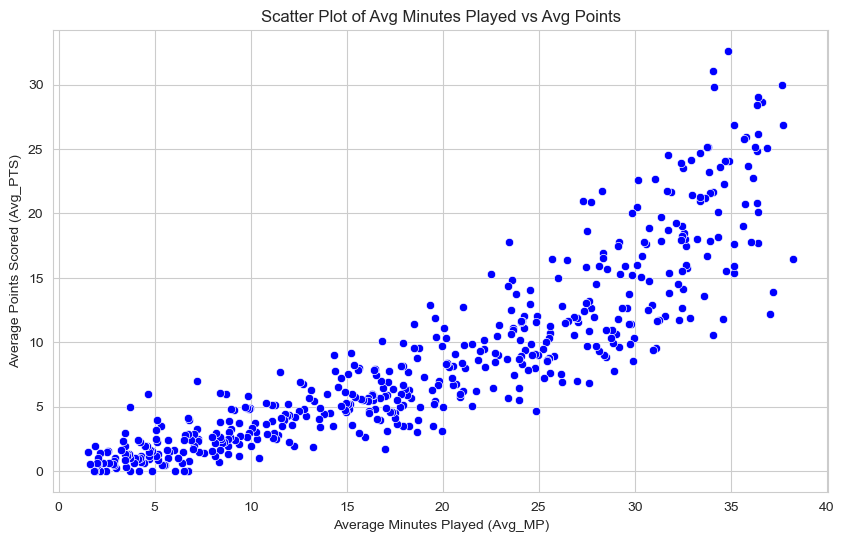

In [18]:
# Set style
sns.set_style("whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_PM, x='Avg_MP', y='Avg_PTS', color='blue')

# Labels and title
plt.xlabel('Average Minutes Played (Avg_MP)')
plt.ylabel('Average Points Scored (Avg_PTS)')
plt.title('Scatter Plot of Avg Minutes Played vs Avg Points')

plt.show()

In [359]:
# Pivot result counts
PR = pd.crosstab(df['Player'], df['Res'])
print(PR)

# Step 1: Group by player and calculate the mean for PTS, AST, and TOV
PA_TO = df.groupby('Player')[['PTS', 'AST', 'TOV']].mean()
print(PA_TO)

# Step 2: Calculate the ratio
PA_TO['PA_TO_Ratio'] = (PA_TO['PTS'] + PA_TO['AST']) / PA_TO['TOV']
PA_TO = PA_TO[np.isfinite(PA_TO['PA_TO_Ratio'])]

# Step 3: Join everything together
ratio_impact = PR.join(PA_TO)

# Optional: Sort by PA_TO_Ratio for insight
ratio_impact_sorted = ratio_impact.sort_values(by='PA_TO_Ratio', ascending=False)

print(ratio_impact_sorted.head(10))

 

Res               L   W
Player                 
A.J. Green        9  11
AJ Johnson        2   3
Aaron Gordon      5   5
Aaron Holiday     5   8
Aaron Nesmith     4   2
...              ..  ..
Zach Edey         6   8
Zach LaVine      10  10
Zeke Nnaji        5   9
Ziaire Williams  12   9
Zion Williamson   4   2

[496 rows x 2 columns]
                       PTS       AST       TOV
Player                                        
A.J. Green        8.200000  1.000000  0.600000
AJ Johnson        1.400000  0.200000  0.400000
Aaron Gordon     15.100000  3.300000  1.400000
Aaron Holiday     3.923077  1.153846  0.230769
Aaron Nesmith     9.166667  1.000000  0.833333
...                    ...       ...       ...
Zach Edey        11.142857  0.785714  1.642857
Zach LaVine      21.250000  4.350000  2.650000
Zeke Nnaji        1.214286  0.214286  0.071429
Ziaire Williams   8.619048  1.142857  0.904762
Zion Williamson  22.666667  5.333333  3.666667

[496 rows x 3 columns]
                     L   W   

In [353]:
# # Join the stats to the win/loss crosstab
# ratio_impact = PR.join(PA_TO)

# # Combine both into a single DataFrame
# ratio_impact = PR.assign(PA_TO_Ratio=PA_TO)
#print(ratio_impact)

# # Sort by 'PA_TO_Ratio' in descending order (highest first)
# sorted_ratio = ratio_impact.sort_values(by='PA_TO_Ratio', ascending=False).reset_index()
# PA_TO = PA_TO[np.isfinite(PA_TO['PA_TO_Ratio'])]
# print(PA_TO)

# # Display sorted DataFrame
# print(sorted_ratio.head(25))

                  L   W Player  PTS  AST  TOV  PA_TO_Ratio
Player                                                    
A.J. Green        9  11    NaN  NaN  NaN  NaN          NaN
AJ Johnson        2   3    NaN  NaN  NaN  NaN          NaN
Aaron Gordon      5   5    NaN  NaN  NaN  NaN          NaN
Aaron Holiday     5   8    NaN  NaN  NaN  NaN          NaN
Aaron Nesmith     4   2    NaN  NaN  NaN  NaN          NaN
...              ..  ..    ...  ...  ...  ...          ...
Zach Edey         6   8    NaN  NaN  NaN  NaN          NaN
Zach LaVine      10  10    NaN  NaN  NaN  NaN          NaN
Zeke Nnaji        5   9    NaN  NaN  NaN  NaN          NaN
Ziaire Williams  12   9    NaN  NaN  NaN  NaN          NaN
Zion Williamson   4   2    NaN  NaN  NaN  NaN          NaN

[496 rows x 7 columns]


In [361]:
# Pivot result counts
PR = pd.crosstab(df['Player'], df['Res'])
print(PR)
PR['winning_perc'] = PR['W'] / (PR['W']+PR['L'])
WP_PR = PR[['winning_perc']]
print(WP_PR)

# Optional: Sort by PA_TO_Ratio for insight
WP_PR_sorted = WR_PR.sort_values(by='winning_perc', ascending=False)

print(WP_PR_sorted.head(15))


Res               L   W
Player                 
A.J. Green        9  11
AJ Johnson        2   3
Aaron Gordon      5   5
Aaron Holiday     5   8
Aaron Nesmith     4   2
...              ..  ..
Zach Edey         6   8
Zach LaVine      10  10
Zeke Nnaji        5   9
Ziaire Williams  12   9
Zion Williamson   4   2

[496 rows x 2 columns]
Res              winning_perc
Player                       
A.J. Green           0.550000
AJ Johnson           0.600000
Aaron Gordon         0.500000
Aaron Holiday        0.615385
Aaron Nesmith        0.333333
...                       ...
Zach Edey            0.571429
Zach LaVine          0.500000
Zeke Nnaji           0.642857
Ziaire Williams      0.428571
Zion Williamson      0.333333

[496 rows x 1 columns]
Res                 winning_perc
Player                          
Collin Gillespie             1.0
Jaylen Martin                1.0
Tristan Thompson             1.0
Branden Carlson              1.0
Colin Castleton              1.0
James Wiseman      

In [22]:
# Sum TOs per department
tov_sum = df.groupby('Player').agg(Sum_TOV=('TOV', 'sum'))
print(tov_sum)

# Combine both into a single DataFrame
wp_tov = WR_PR.assign(TOV_Total=tov_sum)
print(wp_tov)

# Sort by 'TOV_Total' in descending order (highest first)
sorted_wp_tov = wp_tov.sort_values(by='TOV_Total', ascending=False).reset_index()

# Display sorted DataFrame
print(sorted_wp_tov.head(10))

                 Sum_TOV
Player                  
A.J. Green            12
AJ Johnson             2
Aaron Gordon          14
Aaron Holiday          3
Aaron Nesmith          5
...                  ...
Zach Edey             23
Zach LaVine           53
Zeke Nnaji             1
Ziaire Williams       19
Zion Williamson       22

[496 rows x 1 columns]
Res              winning_perc  TOV_Total
Player                                  
A.J. Green           0.550000         12
AJ Johnson           0.600000          2
Aaron Gordon         0.500000         14
Aaron Holiday        0.615385          3
Aaron Nesmith        0.333333          5
...                       ...        ...
Zach Edey            0.571429         23
Zach LaVine          0.500000         53
Zeke Nnaji           0.642857          1
Ziaire Williams      0.428571         19
Zion Williamson      0.333333         22

[496 rows x 2 columns]
Res            Player  winning_perc  TOV_Total
0        James Harden      0.583333        105


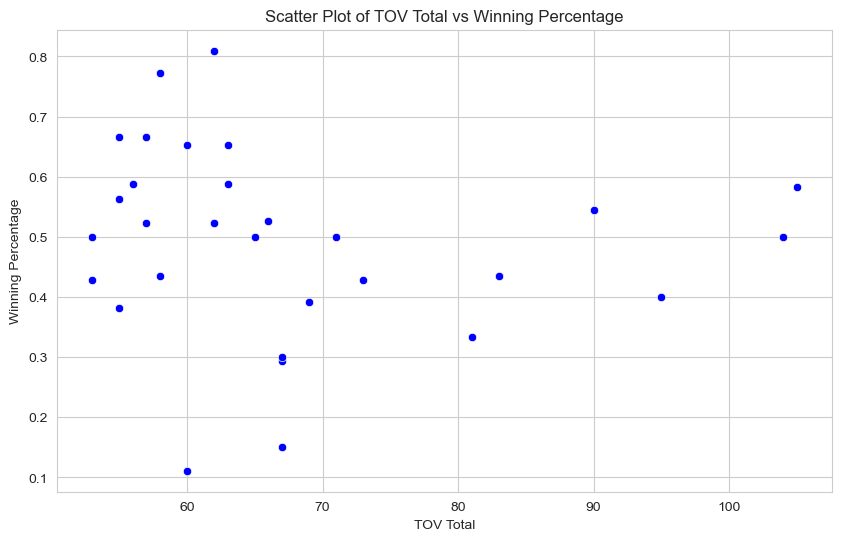

In [23]:
sorted_wp_tov.head(50)

# Set style
sns.set_style("whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_wp_tov.head(30), x='TOV_Total', y='winning_perc', color='blue')

# Labels and title
plt.xlabel('TOV Total')
plt.ylabel('Winning Percentage')
plt.title('Scatter Plot of TOV Total vs Winning Percentage')

plt.show()



In [30]:
# Pivot result counts
TR = pd.crosstab(df['Tm'], df['Res'])
TR['winning_perc'] = TR['W'] / (TR['W']+TR['L'])
WP_TR = TR[['winning_perc']]

sorted_wptr = WP_TR.sort_values(by='winning_perc', ascending=False).reset_index()
print(TR)
sorted_wptr

Res    L    W  winning_perc
Tm                         
ATL  112  115      0.506608
BOS   39  188      0.828194
BRK  136  102      0.428571
CHI  163  110      0.402930
CHO  172   63      0.268085
CLE   29  220      0.883534
DAL   82  178      0.684615
DEN   96  112      0.538462
DET  163   88      0.350598
GSW   95  158      0.624506
HOU   86  168      0.661417
IND  160   89      0.357430
LAC  111  150      0.574713
LAL  103  121      0.540179
MEM   88  174      0.664122
MIA  105  108      0.507042
MIL  116  126      0.520661
MIN   91  120      0.568720
NOP  190   50      0.208333
NYK   71  146      0.672811
OKC   52  205      0.797665
ORL   96  188      0.661972
PHI  175   50      0.222222
PHO  100  120      0.545455
POR  159   83      0.342975
SAC  134  114      0.459677
SAS  129  121      0.484000
TOR  175   74      0.297189
UTA  180   40      0.181818
WAS  211   21      0.090517


Res,Tm,winning_perc
0,CLE,0.883534
1,BOS,0.828194
2,OKC,0.797665
3,DAL,0.684615
4,NYK,0.672811
5,MEM,0.664122
6,ORL,0.661972
7,HOU,0.661417
8,GSW,0.624506
9,LAC,0.574713


In [25]:
# Sum TOs per department
tov_avg = df.groupby('Tm').agg(avg_tov=('TOV', 'mean'))
print(tov_avg)

# Combine both into a single DataFrame
wp_tm_tov = WP_TR.assign(AVG_TOV=tov_avg)
print(wp_tm_tov)

# Sort by 'TOV_Total' in descending order (highest first)
sorted_wp_tm_tov = wp_tm_tov.sort_values(by='AVG_TOV', ascending=False).reset_index()

# Display sorted DataFrame
print(sorted_wp_tm_tov.head(10))

      avg_tov
Tm           
ATL  1.577093
BOS  1.110132
BRK  1.281513
CHI  1.271062
CHO  1.400000
CLE  1.160643
DAL  1.192308
DEN  1.307692
DET  1.513944
GSW  1.118577
HOU  1.114173
IND  1.317269
LAC  1.421456
LAL  1.236607
MEM  1.419847
MIA  1.098592
MIL  1.161157
MIN  1.526066
NOP  1.370833
NYK  1.193548
OKC  0.910506
ORL  1.193662
PHI  1.200000
PHO  1.259091
POR  1.479339
SAC  1.258065
SAS  1.256000
TOR  1.477912
UTA  1.668182
WAS  1.306034
Res  winning_perc   AVG_TOV
Tm                         
ATL      0.506608  1.577093
BOS      0.828194  1.110132
BRK      0.428571  1.281513
CHI      0.402930  1.271062
CHO      0.268085  1.400000
CLE      0.883534  1.160643
DAL      0.684615  1.192308
DEN      0.538462  1.307692
DET      0.350598  1.513944
GSW      0.624506  1.118577
HOU      0.661417  1.114173
IND      0.357430  1.317269
LAC      0.574713  1.421456
LAL      0.540179  1.236607
MEM      0.664122  1.419847
MIA      0.507042  1.098592
MIL      0.520661  1.161157
MIN      0.568720  1

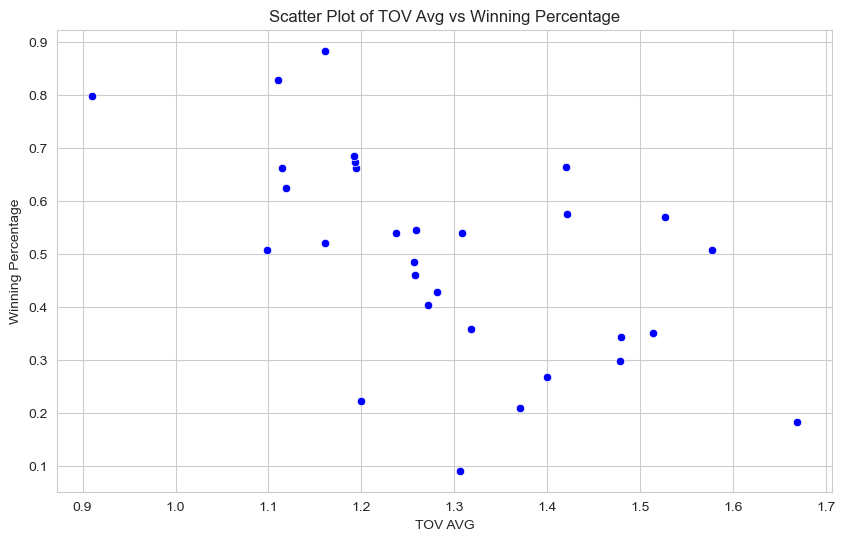

In [363]:
# Set style
sns.set_style("whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_wp_tm_tov, x='AVG_TOV', y='winning_perc', color='blue')

# Labels and title
plt.xlabel('TOV AVG')
plt.ylabel('Winning Percentage')
plt.title('Scatter Plot of TOV Avg vs Winning Percentage')

plt.show()

In [38]:
top_pts_players = df.groupby('Player')['PTS'].mean().nlargest(5).index
avg_pts = avg_pts[avg_pts['Player'].isin(top_pts_players)]

print(top_pts_players)
print(avg_pts)

Index(['Giannis Antetokounmpo', 'LaMelo Ball', 'Nikola Jokić',
       'Shai Gilgeous-Alexander', 'Paolo Banchero'],
      dtype='object', name='Player')
                      Player Res        PTS
305    Giannis Antetokounmpo   L  31.222222
306    Giannis Antetokounmpo   W  33.800000
591              LaMelo Ball   L  32.416667
592              LaMelo Ball   W  28.333333
693             Nikola Jokić   L  27.571429
694             Nikola Jokić   W  31.600000
728           Paolo Banchero   L  23.500000
729           Paolo Banchero   W  32.666667
806  Shai Gilgeous-Alexander   L  30.400000
807  Shai Gilgeous-Alexander   W  29.588235


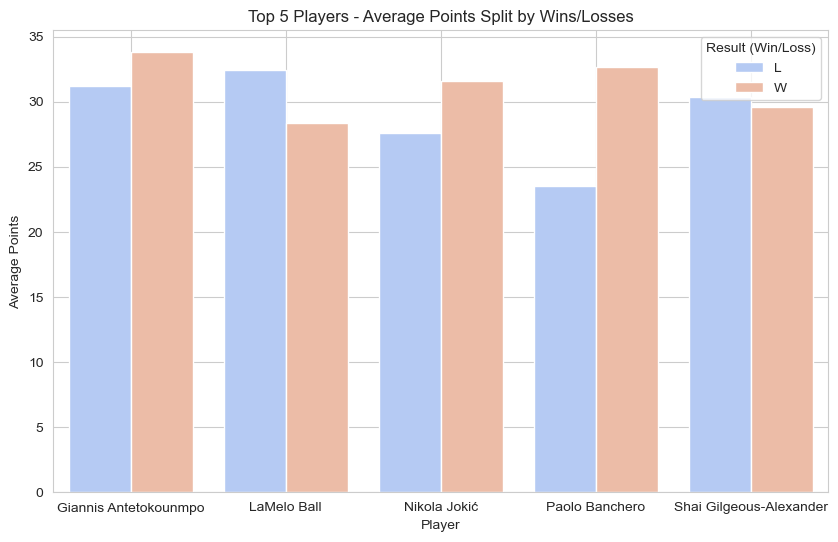

In [34]:
# Group by Player and Result (Win/Loss), then calculate the mean points
avg_pts = df.groupby(['Player', 'Res'])['PTS'].mean().reset_index()

# Get the top 5 players based on overall average points
top_pts_players = df.groupby('Player')['PTS'].mean().nlargest(5).index
avg_pts = avg_pts[avg_pts['Player'].isin(top_pts_players)]  # Filter for top 5

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pts, x='Player', y='PTS', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Points")
plt.title("Top 5 Players - Average Points Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()

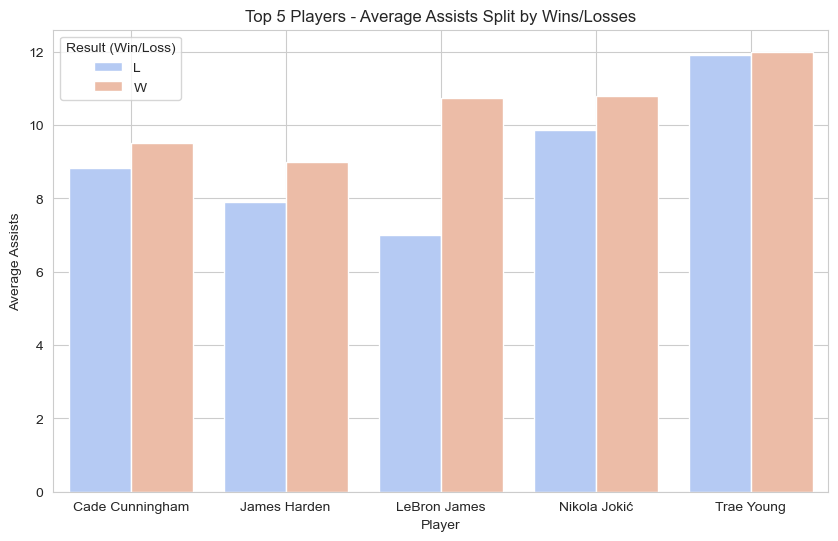

In [42]:
# Group by Player and Result (Win/Loss), then calculate the mean asts
avg_ast = df.groupby(['Player', 'Res'])['AST'].mean().reset_index()

# Get the top 5 players based on overall average points
top_ast_players = df.groupby('Player')['AST'].mean().nlargest(5).index
avg_ast = avg_ast[avg_ast['Player'].isin(top_ast_players)]  # Filter for top 5


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_ast, x='Player', y='AST', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Assists")
plt.title("Top 5 Players - Average Assists Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()

In [168]:
topast_15 = df.groupby('Player')['AST'].mean().nlargest(5).reset_index()
print(topast_15)

# List of players to keep
top_ast_player = ['Trae Young', 'Nikola Jokić', 'Cade Cunningham']

# Selecting specific players and columns
filtered_ast = df.loc[df['Player'].isin(top_ast_player), ['Player', 'Res', 'AST', 'Data']]
filtered_ast



            Player        AST
0       Trae Young  11.954545
1     Nikola Jokić  10.411765
2  Cade Cunningham   9.100000
3     LeBron James   9.045455
4     James Harden   8.541667


,Player,Res,AST,Data
44,Trae Young,W,12,2024-10-23
57,Cade Cunningham,L,8,2024-10-23
281,Nikola Jokić,L,13,2024-10-24
376,Trae Young,W,10,2024-10-25
402,Cade Cunningham,L,6,2024-10-25
607,Nikola Jokić,L,4,2024-10-26
658,Cade Cunningham,L,10,2024-10-26
851,Trae Young,L,8,2024-10-27
943,Nikola Jokić,W,4,2024-10-28
966,Cade Cunningham,L,6,2024-10-28


ValueError: ['red', 'green', 'blue'] is not a valid value for color

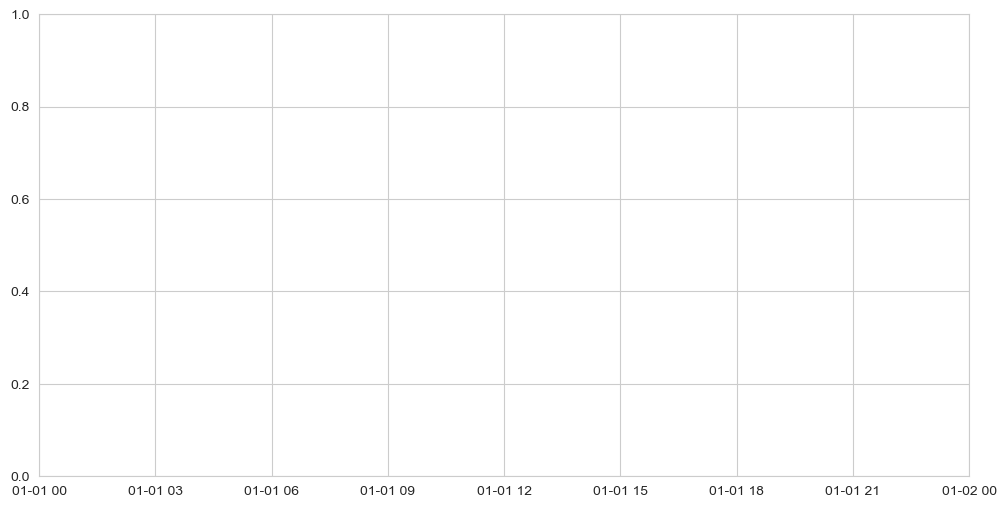

In [250]:
# Convert Date column to datetime format (if not already)
filtered_ast['Data'] = pd.to_datetime(filtered_ast['Data'])

# Sort data by Date
filtered_ast = filtered_ast.sort_values(by=['Player', 'Data'])

# Set plot style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Loop through each player to create a separate line
players = filtered_ast['Player'].unique()
color = ['red', 'green', 'blue']  # Define colors here

for player in players:
    player_data = filtered_ast[filtered_ast['Player'] == player]  # Filter data for each player
    
    # Plot line for assists over time
    plt.plot(player_data['Data'], player_data['AST'], color=color, label=player, marker='o', linewidth=2, linestyle='-', alpha=0.3)

    # Scatter plot to color-code wins/losses
    plt.scatter(
        player_data['Data'], player_data['AST'], 
        c=player_data['Res'].map({'W': 'green', 'L': 'red'}),  # Map results to colors
        edgecolors='black', alpha = 1, s=80  # Adjust size and border color for visibility
    )

# Labels and title
plt.xlabel("Date")
plt.ylabel("Assists")
plt.title("Player Assist Performance Per Game (Wins = Green, Losses = Red)")
plt.legend(title="Players")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

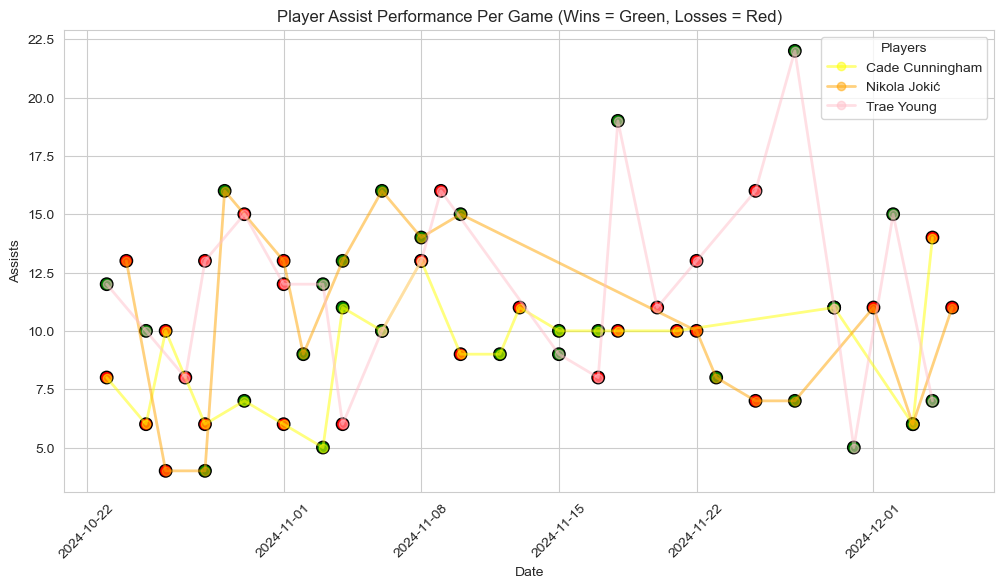

In [258]:

# Sort data by Player and then Date
filtered_ast = filtered_ast.sort_values(by=['Player', 'Data'])

# Set plot style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Loop through each player to create a separate line
players = filtered_ast['Player'].unique()
colors = cycle(['yellow', 'orange', 'pink'])  # Cycle through colors

for player, color in zip(players, colors):
    player_data = filtered_ast[filtered_ast['Player'] == player]  # Filter data for each player
    
    # Plot line for assists over time
    plt.plot(player_data['Data'], player_data['AST'], color=color, label=player, marker='o', linewidth=2, linestyle='-', alpha=0.5)

    # Scatter plot to color-code wins/losses
    plt.scatter(
        player_data['Data'], player_data['AST'], 
        c=player_data['Res'].map({'W': 'green', 'L': 'red'}),  # Map results to colors
        edgecolors='black', alpha=1, s=80  # Adjust size and border color for visibility
    )

# Labels and title
plt.xlabel("Date")
plt.ylabel("Assists")
plt.title("Player Assist Performance Per Game (Wins = Green, Losses = Red)")
plt.legend(title="Players")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

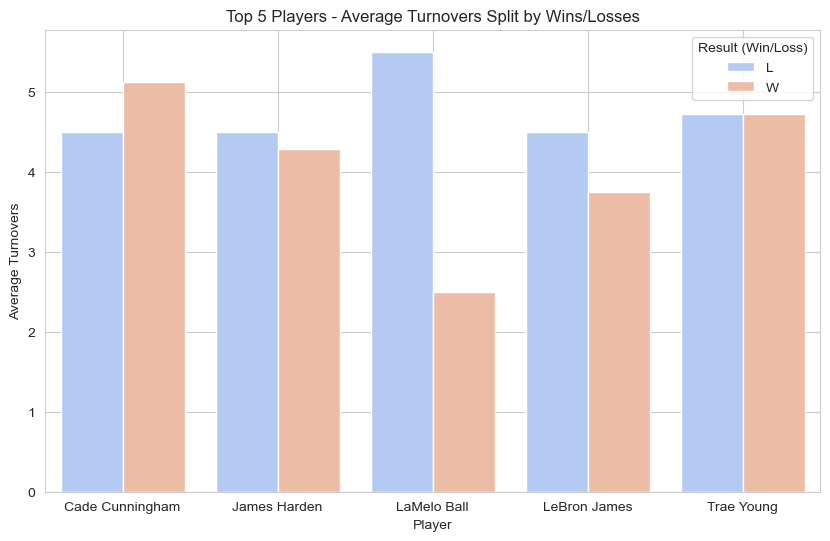

In [365]:
# Group by Player and Result (Win/Loss), then calculate the mean TOV
avg_tov = df.groupby(['Player', 'Res'])['TOV'].mean().reset_index()

# Get the top 5 players based on overall average turnovers
top_tov_players = df.groupby('Player')['TOV'].mean().nlargest(5).index
avg_tov = avg_tov[avg_tov['Player'].isin(top_tov_players)]  # Filter for top 5

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_tov, x='Player', y='TOV', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Turnovers")
plt.title("Top 5 Players - Average Turnovers Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()

#shows for some players turnovers can be less detrimental than others

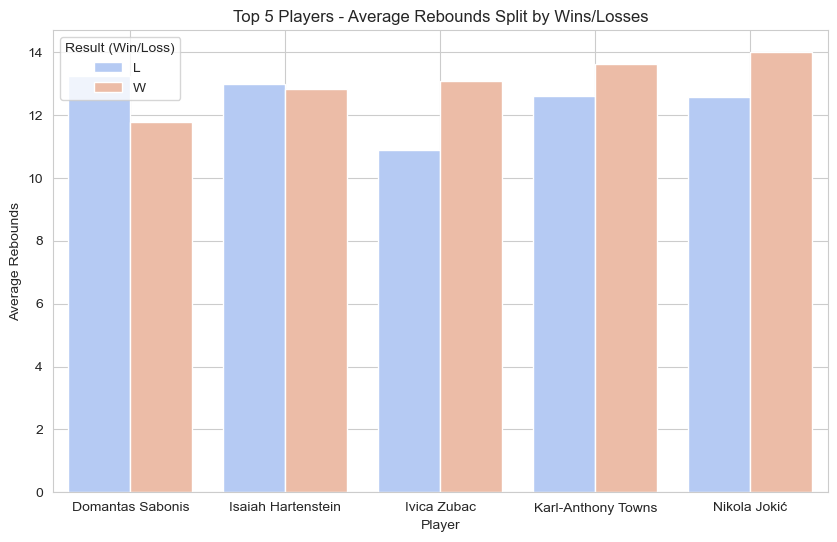

In [204]:
# Group by Player and Result (Win/Loss), then calculate the mean TRB
avg_trb = df.groupby(['Player', 'Res'])['TRB'].mean().reset_index()

# Get the top 5 players based on overall average rebounds
top_trb_players = df.groupby('Player')['TRB'].mean().nlargest(5).index
avg_trb = avg_trb[avg_trb['Player'].isin(top_trb_players)]  # Filter for top 5

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_trb, x='Player', y='TRB', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Rebounds")
plt.title("Top 5 Players - Average Rebouncd Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()


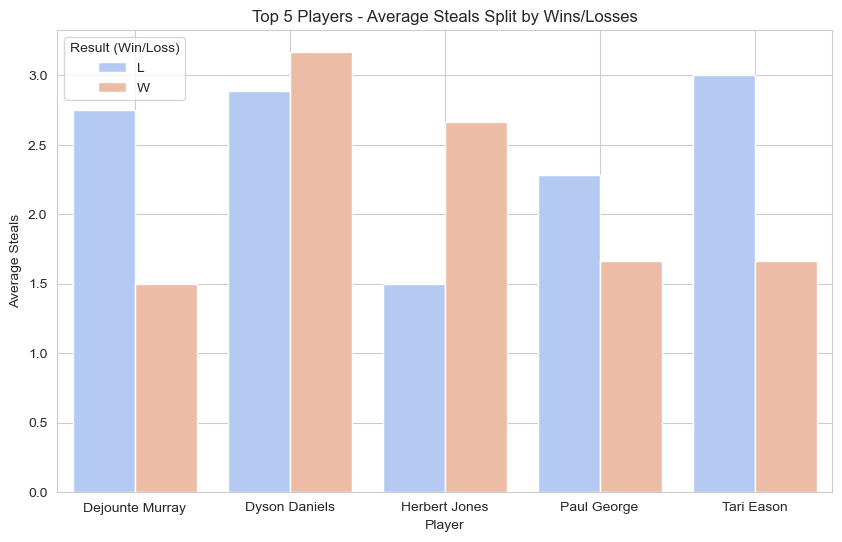

In [206]:
# Group by Player and Result (Win/Loss), then calculate the mean STL
avg_stl = df.groupby(['Player', 'Res'])['STL'].mean().reset_index()

# Get the top 5 players based on overall average steals
top_stl_players = df.groupby('Player')['STL'].mean().nlargest(5).index
avg_stl = avg_stl[avg_stl['Player'].isin(top_stl_players)]  # Filter for top 5

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stl, x='Player', y='STL', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Steals")
plt.title("Top 5 Players - Average Steals Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()

#

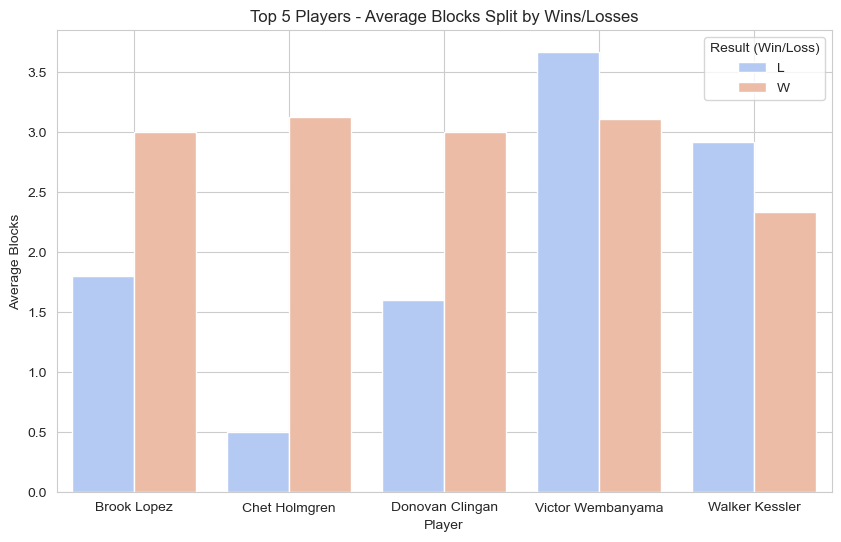

In [208]:
# Group by Player and Result (Win/Loss), then calculate the mean BLK
avg_blk = df.groupby(['Player', 'Res'])['BLK'].mean().reset_index()

# Get the top 5 players based on overall average blocks
top_blk_players = df.groupby('Player')['BLK'].mean().nlargest(5).index
avg_blk = avg_blk[avg_blk['Player'].isin(top_blk_players)]  # Filter for top 5

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_blk, x='Player', y='BLK', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Blocks")
plt.title("Top 5 Players - Average Blocks Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()

#

In [ ]:
# Group by Player and Result (Win/Loss), then calculate the mean BLK
avg_blk = df.groupby(['Player', 'Res'])['BLK'].mean().reset_index()

# Get the top 5 players based on overall average blocks
top_blk_players = df.groupby('Player')['BLK'].mean().nlargest(5).index
avg_blk = avg_blk[avg_blk['Player'].isin(top_blk_players)]  # Filter for top 5

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_blk, x='Player', y='BLK', hue='Res', palette='coolwarm')

# Labels and title
plt.xlabel("Player")
plt.ylabel("Average Blocks")
plt.title("Top 5 Players - Average Blocks Split by Wins/Losses")
plt.legend(title="Result (Win/Loss)")
plt.grid(True)

# Show the plot
plt.show()

#

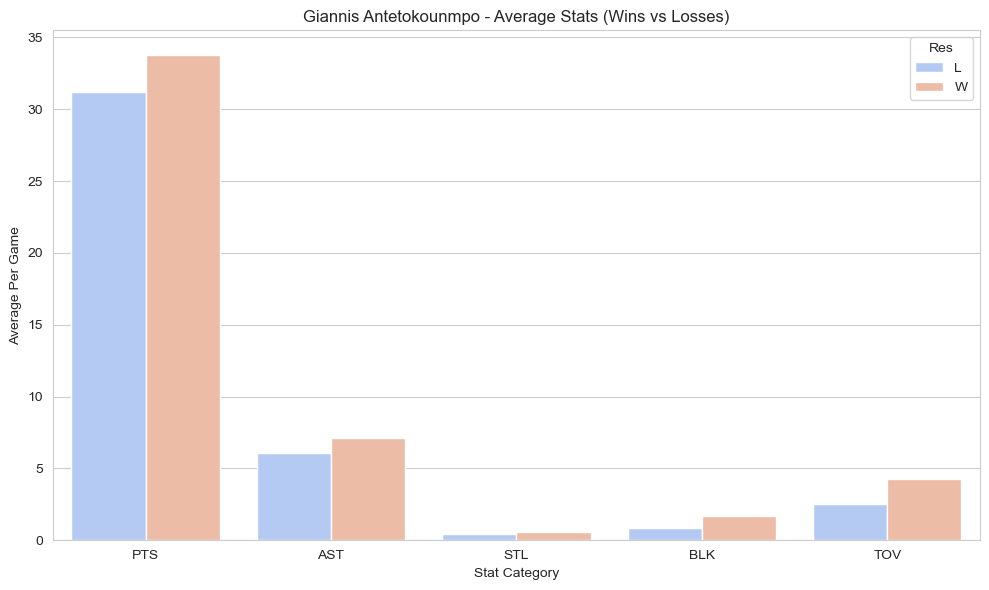

In [216]:


# Filter Giannis' data
giannis = df.loc[df['Player'] == 'Giannis Antetokounmpo', ['Res', 'PTS', 'AST', 'STL', 'BLK', 'TOV']]

# Group by Result and calculate the mean for each stat
giannis_avg = giannis.groupby('Res').mean().reset_index()

# Melt to long format for seaborn
giannis_long = giannis_avg.melt(id_vars='Res', var_name='Stat', value_name='Average')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=giannis_long, x='Stat', y='Average', hue='Res', palette='coolwarm')
plt.title("Giannis Antetokounmpo - Average Stats (Wins vs Losses)")
plt.ylabel("Average Per Game")
plt.xlabel("Stat Category")
plt.tight_layout()
plt.show()

In [278]:
print(giannis)

print(giannis_avg)

print(giannis_long)

     Res  PTS  AST  STL  BLK  TOV
52     W   25    7    0    1    3
379    L   38    5    0    0    3
832    L   22    7    1    1    4
991    L   30    6    0    0    7
1503   L   37    4    1    1    1
1785   L   34    9    1    0    0
2658   W   31    2    1    1    4
2762   L   24    2    0    2    1
3114   L   43    5    0    2    1
3461   W   23    7    0    4    4
3619   W   59    7    2    3    3
4129   L   22   12    0    2    2
4507   W   20    4    0    3    8
4744   W   41    8    1    0    1
5009   W   37   11    2    1    6
5188   W   32    6    0    2    4
6274   W   42   11    0    1    4
6685   W   28    8    0    1    6
6919   L   31    5    1    0    4
  Res        PTS       AST       STL       BLK       TOV
0   L  31.222222  6.111111  0.444444  0.888889  2.555556
1   W  33.800000  7.100000  0.600000  1.700000  4.300000
  Res Stat    Average
0   L  PTS  31.222222
1   W  PTS  33.800000
2   L  AST   6.111111
3   W  AST   7.100000
4   L  STL   0.444444
5   W  STL   0.60

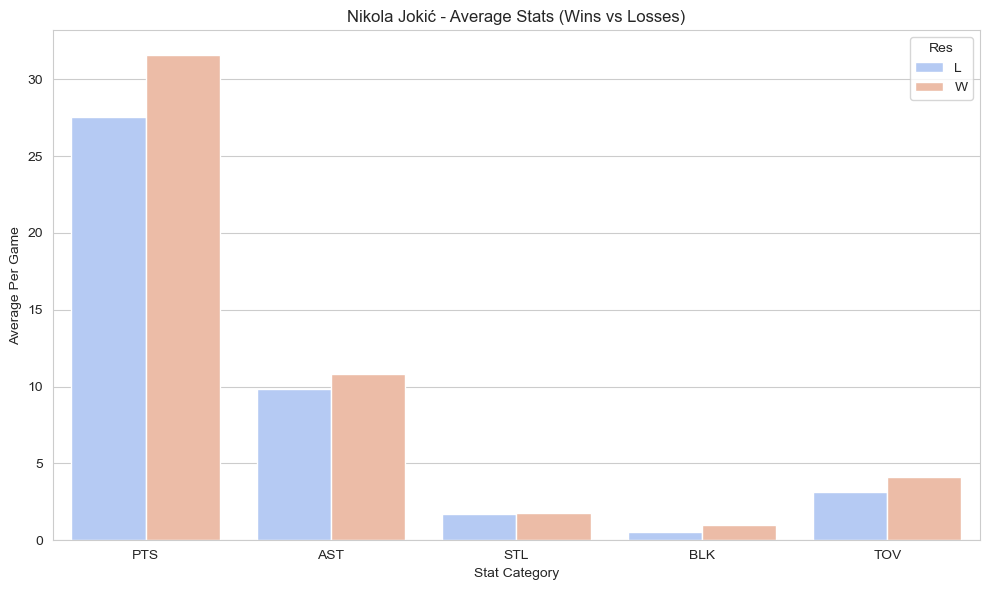

In [242]:
# Filter Jokic data
jokic = df.loc[df['Player'] == 'Nikola Jokić', ['Res', 'PTS', 'AST', 'STL', 'BLK', 'TOV']]

# Group by Result and calculate the mean for each stat
jokic_avg = jokic.groupby('Res').mean().reset_index()

# Melt to long format for seaborn
jokic_long = jokic_avg.melt(id_vars='Res', var_name='Stat', value_name='Average')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=jokic_long, x='Stat', y='Average', hue='Res', palette='coolwarm')
plt.title("Nikola Jokić - Average Stats (Wins vs Losses)")
plt.ylabel("Average Per Game")
plt.xlabel("Stat Category")
plt.tight_layout()
plt.show()

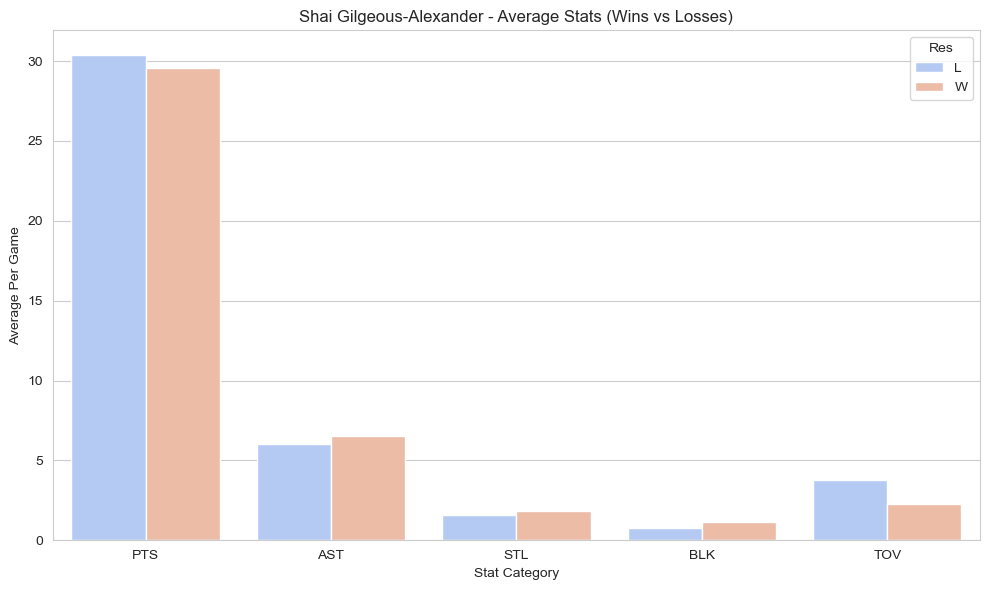

In [244]:
# Filter Shai data
shai = df.loc[df['Player'] == 'Shai Gilgeous-Alexander', ['Res', 'PTS', 'AST', 'STL', 'BLK', 'TOV']]

# Group by Result and calculate the mean for each stat
shai_avg = shai.groupby('Res').mean().reset_index()

# Melt to long format for seaborn
shai_long = shai_avg.melt(id_vars='Res', var_name='Stat', value_name='Average')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=shai_long, x='Stat', y='Average', hue='Res', palette='coolwarm')
plt.title("Shai Gilgeous-Alexander - Average Stats (Wins vs Losses)")
plt.ylabel("Average Per Game")
plt.xlabel("Stat Category")
plt.tight_layout()
plt.show()

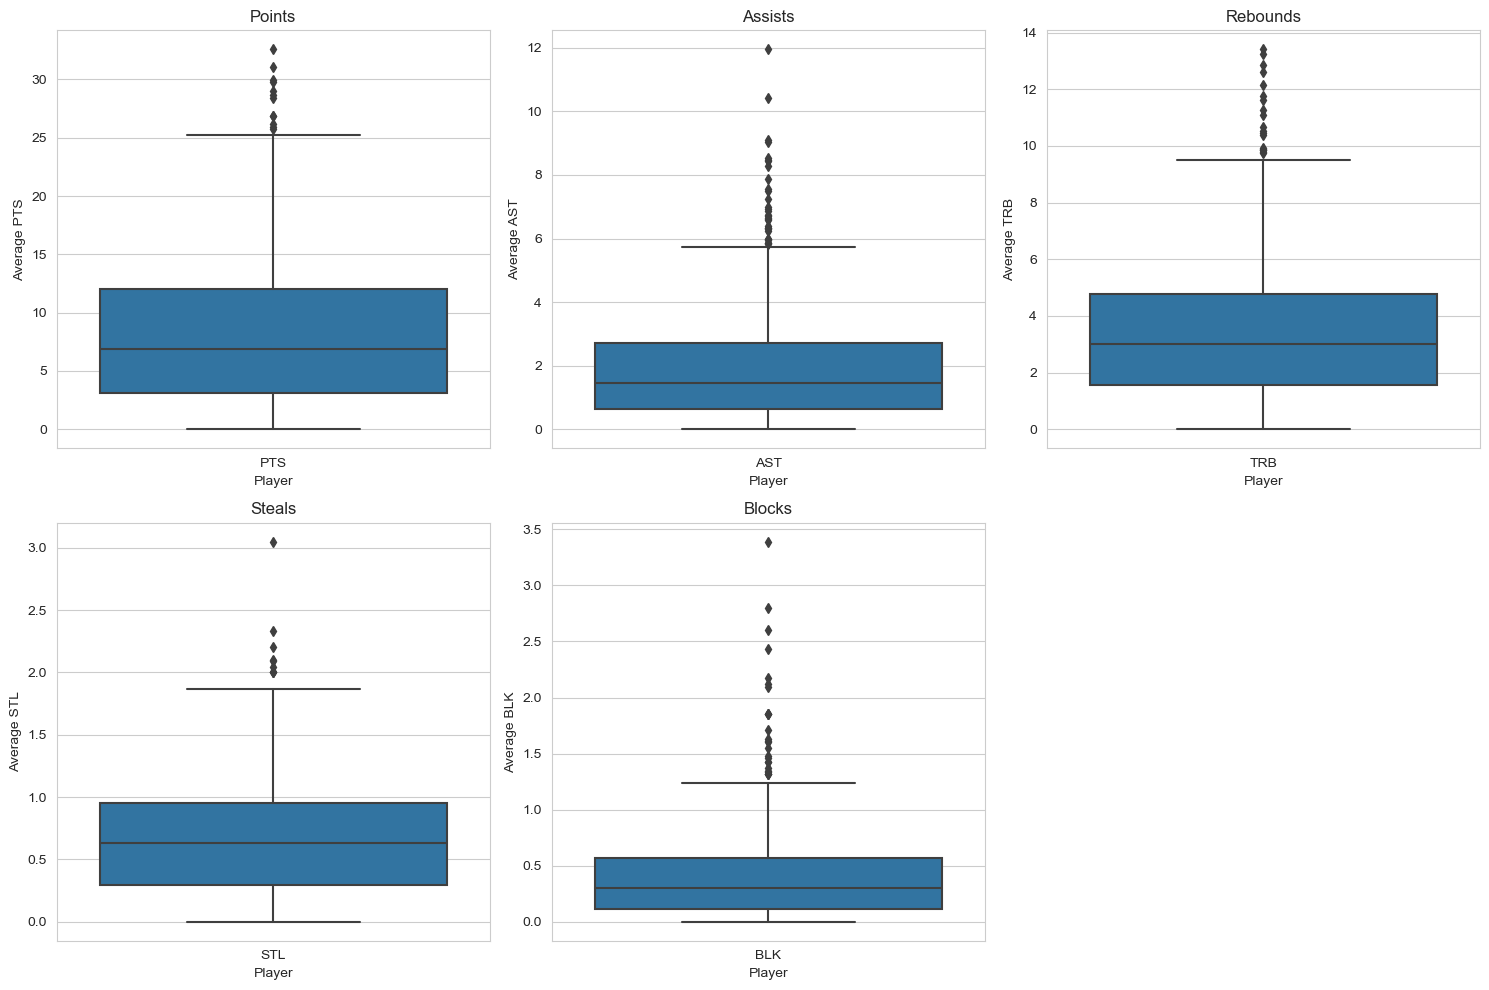

In [156]:
# Group by player and calculate the mean of all numeric stats
avg_player_stats = df.groupby('Player')[['PTS', 'AST', 'TRB', 'STL', 'BLK']].mean().reset_index()

# Convert from wide format to long format for Seaborn boxplot
avg_player_stats_long = avg_player_stats.melt(id_vars='Player', 
                                              value_vars=['PTS', 'AST', 'TRB', 'STL', 'BLK'], 
                                              var_name='Stat', 
                                              value_name='Average')

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create the boxplots manually for each stat
sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'PTS'], ax=axes[0,0])
axes[0,0].set_title('Points')
axes[0,0].set_xlabel('Player')
axes[0,0].set_ylabel('Average PTS')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'AST'], ax=axes[0,1])
axes[0,1].set_title('Assists')
axes[0,1].set_xlabel('Player')
axes[0,1].set_ylabel('Average AST')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'TRB'], ax=axes[0,2])
axes[0,2].set_title('Rebounds')
axes[0,2].set_xlabel('Player')
axes[0,2].set_ylabel('Average TRB')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'STL'], ax=axes[1,0])
axes[1,0].set_title('Steals')
axes[1,0].set_xlabel('Player')
axes[1,0].set_ylabel('Average STL')

sns.boxplot(x='Stat', y='Average', data=avg_player_stats_long[avg_player_stats_long['Stat'] == 'BLK'], ax=axes[1,1])
axes[1,1].set_title('Blocks')
axes[1,1].set_xlabel('Player')
axes[1,1].set_ylabel('Average BLK')

# Remove the unused subplot at axes[1, 2]
axes[1, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


              Player    Avg PTS
0         A.J. Green   8.200000
1         AJ Johnson   1.400000
2       Aaron Gordon  15.100000
3      Aaron Holiday   3.923077
4      Aaron Nesmith   9.166667
..               ...        ...
491        Zach Edey  11.142857
492      Zach LaVine  21.250000
493       Zeke Nnaji   1.214286
494  Ziaire Williams   8.619048
495  Zion Williamson  22.666667

[496 rows x 2 columns]


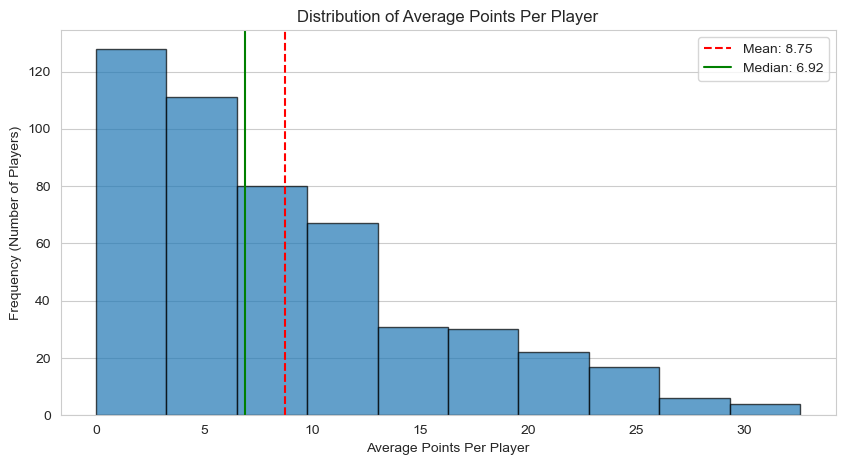

In [234]:
# Calculate the average points per player
avg_pts = df.groupby('Player')['PTS'].mean().reset_index(name='Avg PTS')
print(avg_pts)

# Calculate Mean, Median
mean_pts = avg_pts['Avg PTS'].mean()
median_pts = avg_pts['Avg PTS'].median()

# Create a histogram
plt.figure(figsize=(10, 5))
plt.hist(avg_pts['Avg PTS'], bins=10, edgecolor='black', alpha=0.7)# Adjust bins as needed
plt.axvline(mean_pts, color='r', linestyle='--', label=f"Mean: {mean_pts:.2f}")
plt.axvline(median_pts, color='g', linestyle='-', label=f"Median: {median_pts:.2f}")

# Formatting
plt.xlabel("Average Points Per Player")
plt.ylabel("Frequency (Number of Players)")
plt.title("Distribution of Average Points Per Player")
plt.grid(axis='x')

# Show the plot
plt.legend()
plt.show()

  PTS_Group  Percentage_of_Players
0    (0, 5]              36.363636
1   (5, 10]              28.512397
2  (10, 15]              15.495868
3  (15, 20]               9.917355
4  (20, 25]               6.404959
5  (25, 30]               2.892562
6  (30, 35]               0.413223


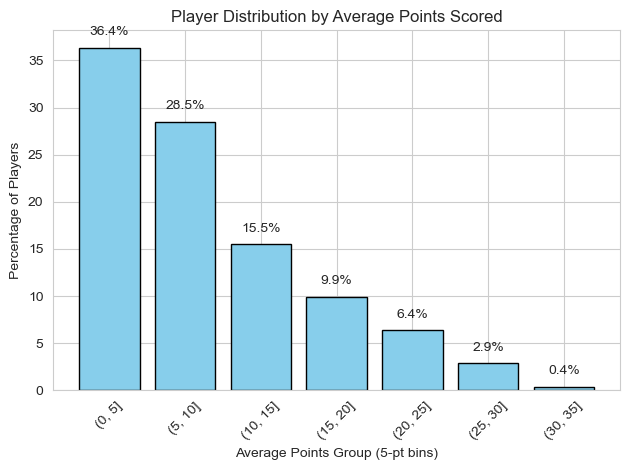

In [224]:
# Step 1: Group by player and calculate average points
avg_pts2 = df.groupby('Player')['PTS'].mean().reset_index()

# Step 2: Create 5-point bins (e.g., 0–5, 5–10, etc.)
avg_pts2['PTS_Group'] = pd.cut(avg_pts2['PTS'], bins=range(0, int(avg_pts2['PTS'].max()) + 6, 5))

# Step 3: Count number of players in each bin
group_counts = avg_pts2['PTS_Group'].value_counts().sort_index()

# Step 4: Convert to percentage of total players
group_percentages = (group_counts / group_counts.sum()) * 100

# Step 5 (Optional): Turn into a DataFrame
result_df = group_percentages.reset_index()
result_df.columns = ['PTS_Group', 'Percentage_of_Players']
print(result_df)

# Step 6 (Optional): Plot it
plt.bar(result_df['PTS_Group'].astype(str), result_df['Percentage_of_Players'], color='skyblue', edgecolor='black')

# Add data labels on top of each bar
for i, value in enumerate(result_df['Percentage_of_Players']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=45)
plt.ylabel('Percentage of Players')
plt.xlabel('Average Points Group (5-pt bins)')
plt.title('Player Distribution by Average Points Scored')
plt.tight_layout()
plt.show()

  AST_Group  Percentage_of_Players
0    (0, 2]              62.008734
1    (2, 4]              22.052402
2    (4, 6]              10.480349
3    (6, 8]               3.711790
4   (8, 10]               1.310044
5  (10, 12]               0.436681


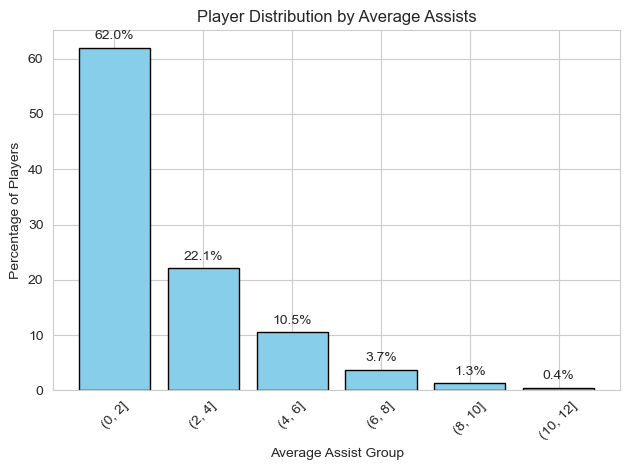

In [184]:
# Step 1: Group by player and calculate average assists
avg_ast = df.groupby('Player')['AST'].mean().reset_index()

# Step 2: Create 2-point bins 
avg_ast['AST_Group'] = pd.cut(avg_ast['AST'], bins=range(0, int(avg_ast['AST'].max()) + 3, 2))

# Step 3: Count number of players in each bin
astgroup_counts = avg_ast['AST_Group'].value_counts().sort_index()

# Step 4: Convert to percentage of total players
astgroup_percentages = (astgroup_counts / astgroup_counts.sum()) * 100

# Step 5 (Optional): Turn into a DataFrame
ast_df = astgroup_percentages.reset_index()
ast_df.columns = ['AST_Group', 'Percentage_of_Players']
print(ast_df)

# Step 6 (Optional): Plot it
plt.bar(ast_df['AST_Group'].astype(str), ast_df['Percentage_of_Players'], color='skyblue', edgecolor='black')
# Add data labels on top of each bar
for i, value in enumerate(ast_df['Percentage_of_Players']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.ylabel('Percentage of Players')
plt.xlabel('Average Assist Group')
plt.title('Player Distribution by Average Assists')
plt.tight_layout()
plt.show()

  TRB_Group  Percentage_of_Players
0    (0, 2]              31.404959
1    (2, 4]              35.950413
2    (4, 6]              16.942149
3    (6, 8]               9.090909
4   (8, 10]               3.925620
5  (10, 12]               1.652893
6  (12, 14]               1.033058


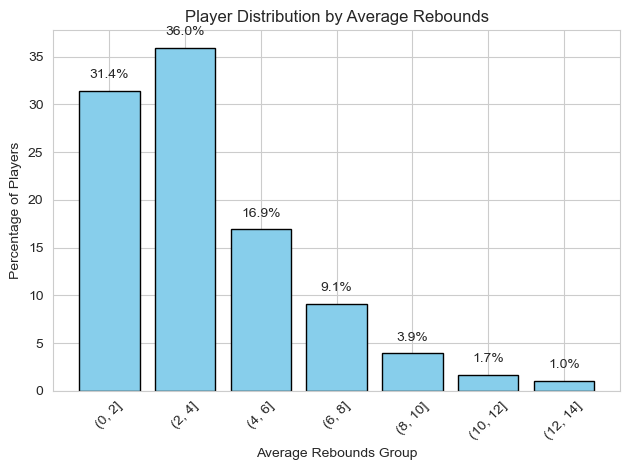

In [182]:
# Step 1: Group by player and calculate average assists
avg_trb = df.groupby('Player')['TRB'].mean().reset_index()

# Step 2: Create 2-point bins 
avg_trb['TRB_Group'] = pd.cut(avg_trb['TRB'], bins=range(0, int(avg_trb['TRB'].max()) + 3, 2))

# Step 3: Count number of players in each bin
trbgroup_counts = avg_trb['TRB_Group'].value_counts().sort_index()

# Step 4: Convert to percentage of total players
trbgroup_percentages = (trbgroup_counts / trbgroup_counts.sum()) * 100

# Step 5 (Optional): Turn into a DataFrame
trb_df = trbgroup_percentages.reset_index()
trb_df.columns = ['TRB_Group', 'Percentage_of_Players']
print(trb_df)

# Step 6 (Optional): Plot it
plt.bar(trb_df['TRB_Group'].astype(str), trb_df['Percentage_of_Players'], color='skyblue', edgecolor='black')
# Add data labels on top of each bar
for i, value in enumerate(trb_df['Percentage_of_Players']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.ylabel('Percentage of Players')
plt.xlabel('Average Rebounds Group')
plt.title('Player Distribution by Average Rebounds')
plt.tight_layout()
plt.show()

  STL_Group  Percentage_of_Players
0    (0, 1]              76.851852
1    (1, 2]              21.759259
2    (2, 3]               1.157407
3    (3, 4]               0.231481


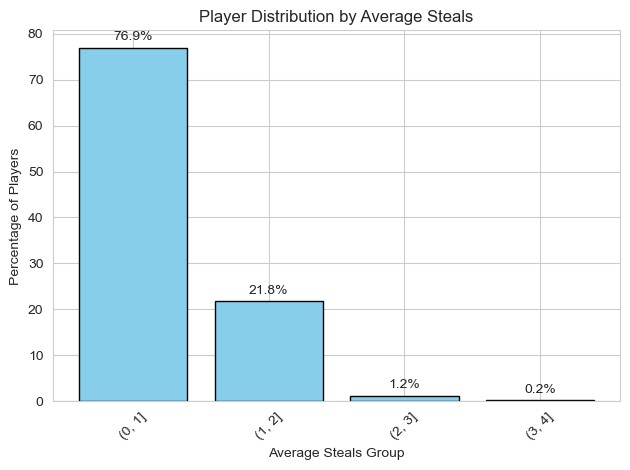

In [200]:
# Step 1: Group by player and calculate average steals
avg_stl = df.groupby('Player')['STL'].mean().reset_index()

# Step 2: Create 0.5-point bins 
avg_stl['STL_Group'] = pd.cut(avg_stl['STL'], bins=range(0, int(avg_stl['STL'].max()) + 2, 1))

# Step 3: Count number of players in each bin
stlgroup_counts = avg_stl['STL_Group'].value_counts().sort_index()

# Step 4: Convert to percentage of total players
stlgroup_percentages = (stlgroup_counts / stlgroup_counts.sum()) * 100

# Step 5 (Optional): Turn into a DataFrame
stl_df = stlgroup_percentages.reset_index()
stl_df.columns = ['STL_Group', 'Percentage_of_Players']
print(stl_df)

# Step 6 (Optional): Plot it
plt.bar(stl_df['STL_Group'].astype(str), stl_df['Percentage_of_Players'], color='skyblue', edgecolor='black')
# Add data labels on top of each bar
for i, value in enumerate(stl_df['Percentage_of_Players']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.ylabel('Percentage of Players')
plt.xlabel('Average Steals Group')
plt.title('Player Distribution by Average Steals')
plt.tight_layout()
plt.show()

  BLK_Group  Percentage_of_Players
0    (0, 1]              90.487805
1    (1, 2]               7.804878
2    (2, 3]               1.463415
3    (3, 4]               0.243902


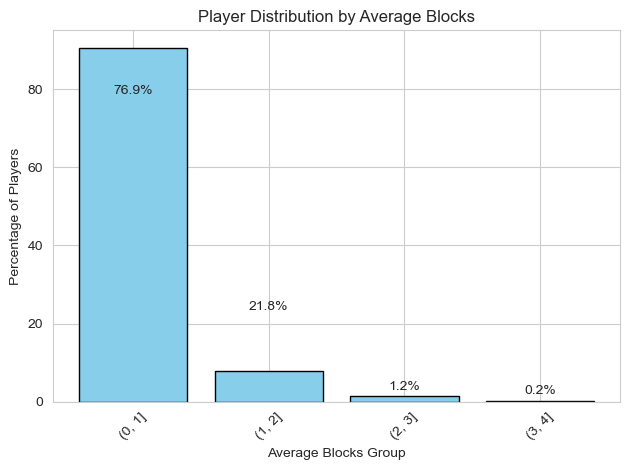

In [202]:
# Step 1: Group by player and calculate average blocks
avg_blk = df.groupby('Player')['BLK'].mean().reset_index()

# Step 2: Create 1-point bins 
avg_blk['BLK_Group'] = pd.cut(avg_blk['BLK'], bins=range(0, int(avg_blk['BLK'].max()) + 2, 1))

# Step 3: Count number of players in each bin
blkgroup_counts = avg_blk['BLK_Group'].value_counts().sort_index()

# Step 4: Convert to percentage of total players
blkgroup_percentages = (blkgroup_counts / blkgroup_counts.sum()) * 100

# Step 5 (Optional): Turn into a DataFrame
blk_df = blkgroup_percentages.reset_index()
blk_df.columns = ['BLK_Group', 'Percentage_of_Players']
print(blk_df)

# Step 6 (Optional): Plot it
plt.bar(blk_df['BLK_Group'].astype(str), blk_df['Percentage_of_Players'], color='skyblue', edgecolor='black')
# Add data labels on top of each bar
for i, value in enumerate(stl_df['Percentage_of_Players']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.ylabel('Percentage of Players')
plt.xlabel('Average Blocks Group')
plt.title('Player Distribution by Average Blocks')
plt.tight_layout()
plt.show()

PTS    1.000000
FG     0.968779
MP     0.745089
3P     0.694185
FT     0.658972
Name: PTS, dtype: float64


/Users/ryanoka/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


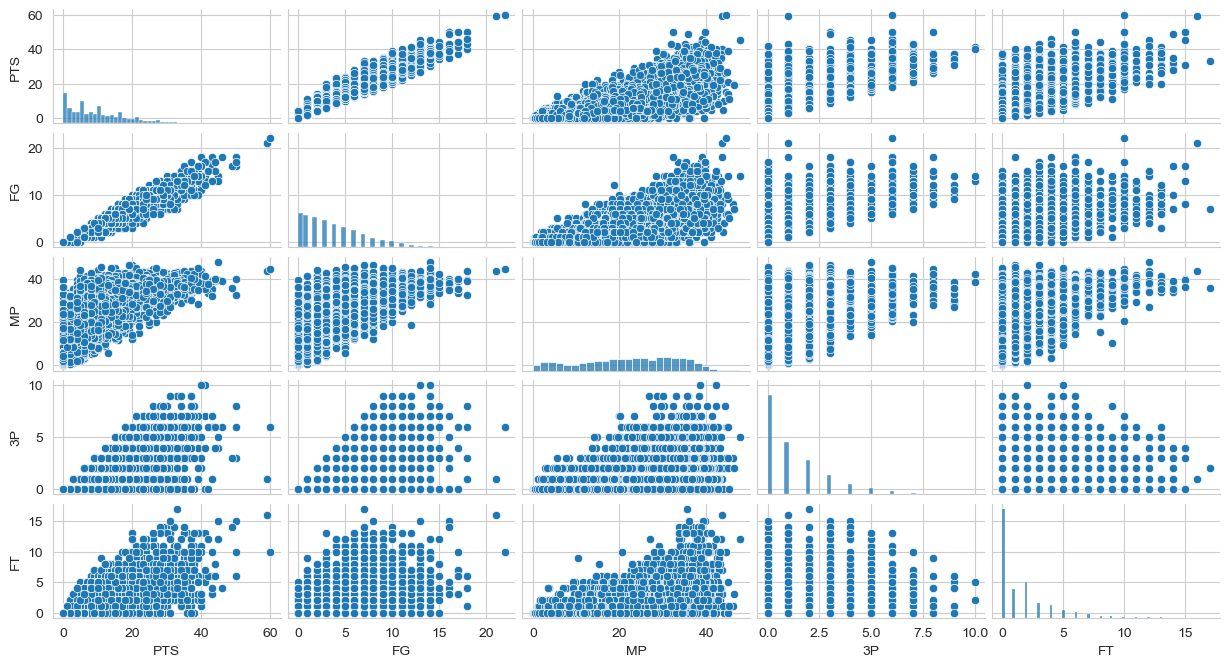

In [240]:
# Calculate the correlation of all features with 'Pts'
selected_cols = ['PTS', 'MP', 'FG', '3P', 'FT']
correlations = df[selected_cols].corr()['PTS'].sort_values(ascending=False)
print(correlations)

# Top 5 features most correlated with 'PTS'
top_5_features = correlations.index[1:6]
 
# Creating the pair plot for these features and 'PTS'
# Adjust the size by setting height and aspect
sns.pairplot(df, vars=['PTS'] + list(top_5_features), height=1.35, aspect=1.85)
 
# Displaying the plot
plt.show()

In [432]:
# Filter Team data
team = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # or use 'max'/'min' if all are the same
}).reset_index()
team

# Group by Result and calculate the mean for each stat
team_avg = team.groupby(['Tm', 'Res']).mean(numeric_only=True).reset_index()
team_avg

,Tm,Res,PTS,AST,TRB,STL,BLK,TOV
0,ATL,L,112.090909,29.000000,44.363636,9.636364,4.818182,16.272727
1,ATL,W,120.750000,30.416667,47.333333,10.750000,5.750000,14.916667
2,BOS,L,117.750000,22.500000,44.500000,8.500000,4.750000,13.500000
3,BOS,W,121.111111,26.333333,43.722222,7.333333,5.722222,11.000000
4,BRK,L,106.461538,25.000000,37.230769,5.846154,3.692308,13.769231
5,BRK,W,114.500000,27.000000,39.800000,8.200000,4.000000,12.600000
6,CHI,L,114.846154,27.692308,42.538462,6.769231,4.153846,16.000000
7,CHI,W,126.200000,31.200000,47.800000,7.400000,5.300000,13.900000
8,CHO,L,103.625000,22.687500,44.312500,7.750000,4.500000,15.437500
9,CHO,W,116.166667,24.000000,48.833333,7.500000,6.333333,13.666667


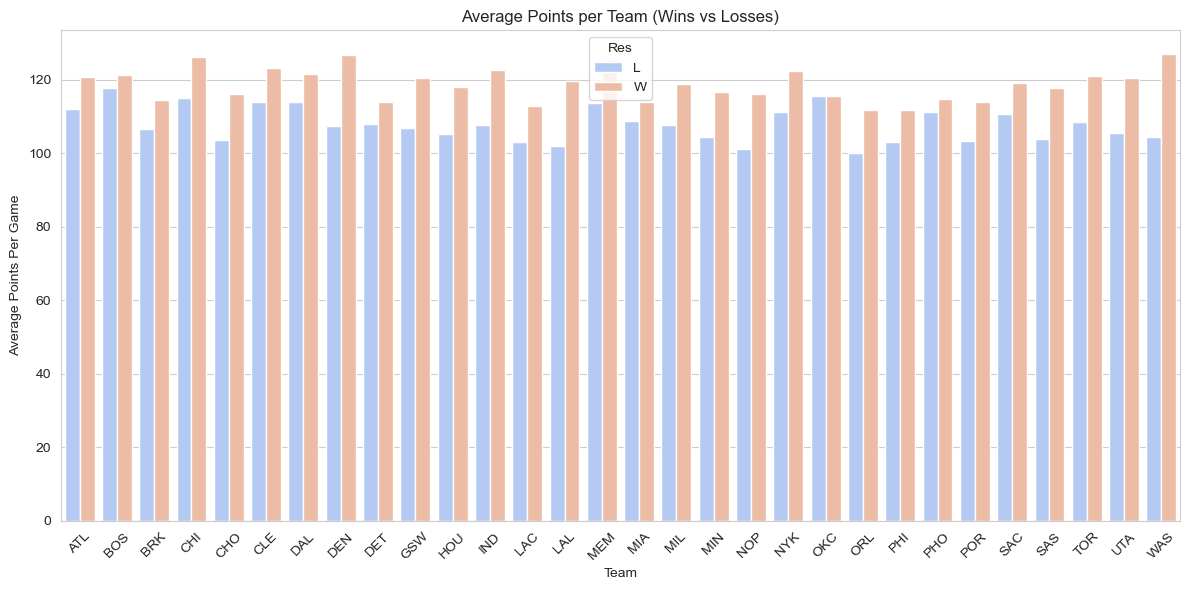

In [300]:
#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=team_avg, x='Tm', y='PTS', hue='Res', palette='coolwarm')

# Formatting
plt.title("Average Points per Team (Wins vs Losses)")
plt.xlabel("Team")
plt.ylabel("Average Points Per Game")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [494]:
# Filter Team data
opponent = df.groupby(['Opp', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # or use 'max'/'min' if all are the same
}).reset_index()
#print(opponent)


# Group by Result and calculate the mean for each stat
opponent_avg = opponent.groupby(['Opp', 'Res']).mean(numeric_only=True).reset_index()

# Swap results: W becomes L, L becomes W
opponent_avg['Res'] = opponent_avg['Res'].replace({'W': 'L', 'L': 'W'})
opponent_avg

                Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA  ...  \
0         Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  ...   
1        Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  ...   
2        Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  ...   
3         Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  ...   
4        Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  ...   
...                ...  ...  ...  ..    ...  ..  ...    ...  ..  ...  ...   
7216  Precious Achiuwa  NYK  CHO   W  12.25   1    4  0.250   0    1  ...   
7217      Jericho Sims  NYK  CHO   W   3.37   0    1  0.000   0    0  ...   
7218      Chris Duarte  CHI  SAS   W   4.27   0    1  0.000   0    1  ...   
7219       Jamal Shead  TOR  OKC   L  11.90   0    4  0.000   0    4  ...   
7220        KJ Simpson  CHO  NYK   L  17.03   0    4  0.000   0    2  ...   

      DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc        Data  
0       4  

,Opp,Res,PTS,AST,TRB,STL,BLK,TOV
0,ATL,W,112.416667,24.416667,43.416667,9.000000,4.416667,16.000000
1,ATL,L,124.909091,29.181818,45.818182,10.272727,7.272727,16.000000
2,BOS,W,107.777778,23.888889,41.944444,6.166667,3.666667,12.666667
3,BOS,L,121.250000,28.000000,49.500000,9.250000,4.750000,15.500000
4,BRK,W,107.400000,25.400000,42.100000,7.200000,5.500000,16.200000
5,BRK,L,118.461538,27.615385,43.769231,8.461538,7.307692,13.000000
6,CHI,W,114.800000,28.400000,44.300000,7.500000,4.700000,11.600000
7,CHI,L,129.769231,30.461538,47.000000,9.461538,5.307692,11.076923
8,CHO,W,110.500000,29.166667,43.833333,7.666667,4.333333,12.000000
9,CHO,L,113.375000,24.687500,42.500000,7.812500,5.687500,14.187500


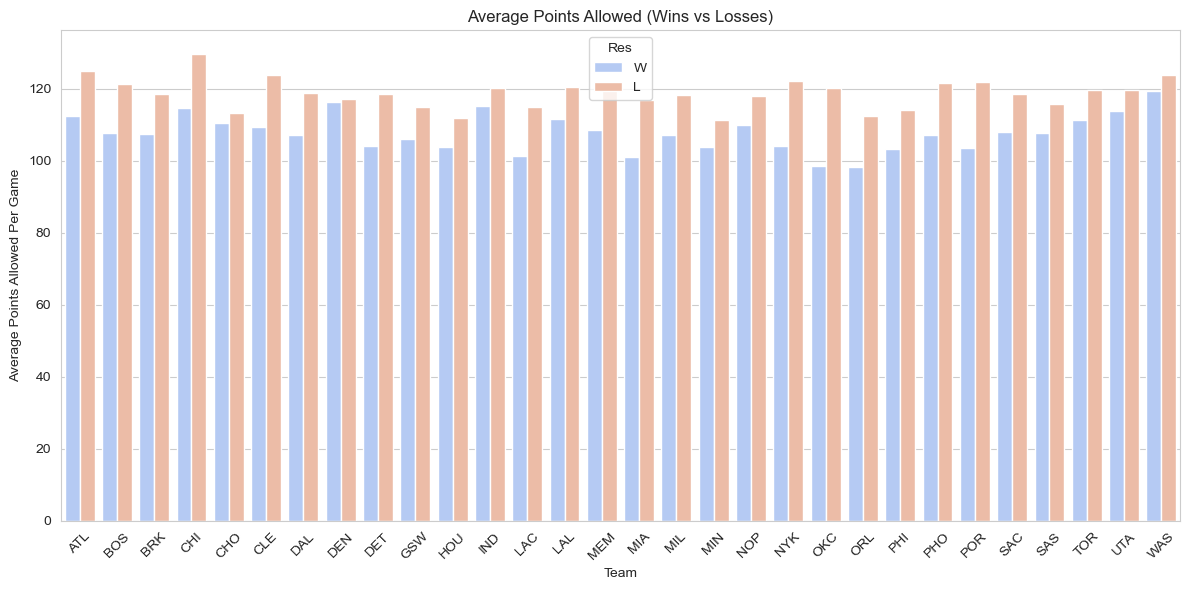

In [312]:
#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=opponent_avg, x='Opp', y='PTS', hue='Res', palette='coolwarm')

# Formatting
plt.title("Average Points Allowed (Wins vs Losses)")
plt.xlabel("Team")
plt.ylabel("Average Points Allowed Per Game")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

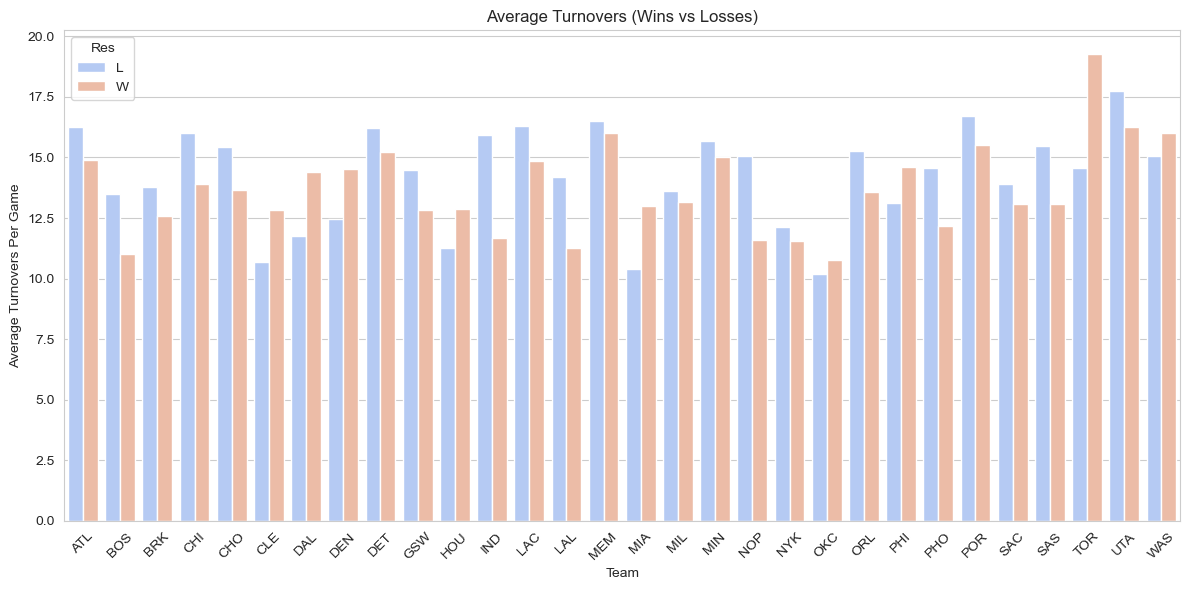

In [436]:
#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=team_avg, x='Tm', y='TOV', hue='Res', palette='coolwarm')

# Formatting
plt.title("Average Turnovers (Wins vs Losses)")
plt.xlabel("Team")
plt.ylabel("Average Turnovers Per Game")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [434]:
print(team_avg)

# # Filter Team data
# team_res = df.groupby(['Tm', 'Data','Res'])
# print(team_res)

# # Group by Result and calculate the mean for each stat
# team_avg = team.groupby(['Tm', 'Res']).mean(numeric_only=True).reset_index()
# team_avg

# # Pivot result counts for team winning percentage
# TR = pd.crosstab(df['Tm'], df['Res'])
# TR['winning_perc'] = TR['W'] / (TR['W']+TR['L'])
# WP_TR = TR[['winning_perc']]
# WP_TR

# TR_sorted = WP_TR.sort_values(by='winning_perc', ascending=False)  # Sorts in descending order

# # Apply background gradient
# TR_sorted = TR_sorted.style.background_gradient(subset=['winning_perc'], cmap='coolwarm')

# # Display the styled DataFrame
# TR_sorted

     Tm Res         PTS        AST        TRB        STL       BLK        TOV
0   ATL   L  112.090909  29.000000  44.363636   9.636364  4.818182  16.272727
1   ATL   W  120.750000  30.416667  47.333333  10.750000  5.750000  14.916667
2   BOS   L  117.750000  22.500000  44.500000   8.500000  4.750000  13.500000
3   BOS   W  121.111111  26.333333  43.722222   7.333333  5.722222  11.000000
4   BRK   L  106.461538  25.000000  37.230769   5.846154  3.692308  13.769231
5   BRK   W  114.500000  27.000000  39.800000   8.200000  4.000000  12.600000
6   CHI   L  114.846154  27.692308  42.538462   6.769231  4.153846  16.000000
7   CHI   W  126.200000  31.200000  47.800000   7.400000  5.300000  13.900000
8   CHO   L  103.625000  22.687500  44.312500   7.750000  4.500000  15.437500
9   CHO   W  116.166667  24.000000  48.833333   7.500000  6.333333  13.666667
10  CLE   L  114.000000  27.333333  41.666667   8.000000  2.666667  10.666667
11  CLE   W  123.200000  28.350000  43.450000   9.300000  5.1500

In [400]:
# Filter Team data
team_stats = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
}).reset_index()

# Group by Result and calculate the mean for each stat
team_statsavg = team_stats.groupby(['Tm']).mean(numeric_only=True).reset_index()
print(team_statsavg)

# Filter Team data
opponent_stats = df.groupby(['Opp', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
}).reset_index()

# Group by Result and calculate the mean for each stat
opponent_statsavg = opponent_stats.groupby(['Opp']).mean(numeric_only=True).reset_index()

# Rename a specific column
opponent_statsavg.rename(columns={'PTS': 'PTS Allowed'}, inplace=True)
print(opponent_statsavg)


pts_combo = pd.merge(
    team_statsavg,
    opponent_statsavg,
    left_on='Tm',
    right_on='Opp',
    suffixes=('_team', '_opp')
)

pts_combo

     Tm         PTS        AST        TRB        STL       BLK        TOV
0   ATL  116.608696  29.739130  45.913043  10.217391  5.304348  15.565217
1   BOS  120.500000  25.636364  43.863636   7.545455  5.545455  11.454545
2   BRK  109.956522  25.869565  38.347826   6.869565  3.826087  13.260870
3   CHI  119.782609  29.217391  44.826087   7.043478  4.652174  15.086957
4   CHO  107.045455  23.045455  45.545455   7.681818  5.000000  14.954545
5   CLE  122.000000  28.217391  43.217391   9.130435  4.826087  12.565217
6   DAL  118.869565  25.869565  45.695652   8.217391  5.565217  13.478261
7   DEN  117.850000  30.100000  44.400000   8.700000  4.750000  13.600000
8   DET  110.125000  25.208333  45.458333   6.250000  5.541667  15.833333
9   GSW  115.285714  29.666667  49.190476   9.000000  5.285714  13.476190
10  HOU  113.478261  22.478261  49.913043   8.913043  5.739130  12.304348
11  IND  113.434783  27.000000  39.913043   8.347826  5.130435  14.260870
12  LAC  108.791667  24.750000  45.125

,Tm,PTS,AST_team,TRB_team,STL_team,BLK_team,TOV_team,Opp,PTS Allowed,AST_opp,TRB_opp,STL_opp,BLK_opp,TOV_opp
0,ATL,116.608696,29.739130,45.913043,10.217391,5.304348,15.565217,ATL,118.391304,26.695652,44.565217,9.608696,5.782609,16.000000
1,BOS,120.500000,25.636364,43.863636,7.545455,5.545455,11.454545,BOS,110.227273,24.636364,43.318182,6.727273,3.863636,13.181818
2,BRK,109.956522,25.869565,38.347826,6.869565,3.826087,13.260870,BRK,113.652174,26.652174,43.043478,7.913043,6.521739,14.391304
3,CHI,119.782609,29.217391,44.826087,7.043478,4.652174,15.086957,CHI,123.260870,29.565217,45.826087,8.608696,5.043478,11.304348
4,CHO,107.045455,23.045455,45.545455,7.681818,5.000000,14.954545,CHO,112.590909,25.909091,42.863636,7.772727,5.318182,13.590909
5,CLE,122.000000,28.217391,43.217391,9.130435,4.826087,12.565217,CLE,111.434783,25.565217,43.826087,7.565217,4.739130,14.956522
6,DAL,118.869565,25.869565,45.695652,8.217391,5.565217,13.478261,DAL,111.173913,26.304348,43.695652,7.956522,4.260870,13.608696
7,DEN,117.850000,30.100000,44.400000,8.700000,4.750000,13.600000,DEN,116.800000,30.000000,44.350000,8.500000,5.750000,14.150000
8,DET,110.125000,25.208333,45.458333,6.250000,5.541667,15.833333,DET,113.125000,24.875000,42.375000,9.916667,5.041667,12.791667
9,GSW,115.285714,29.666667,49.190476,9.000000,5.285714,13.476190,GSW,109.428571,25.809524,46.047619,7.428571,6.142857,14.238095


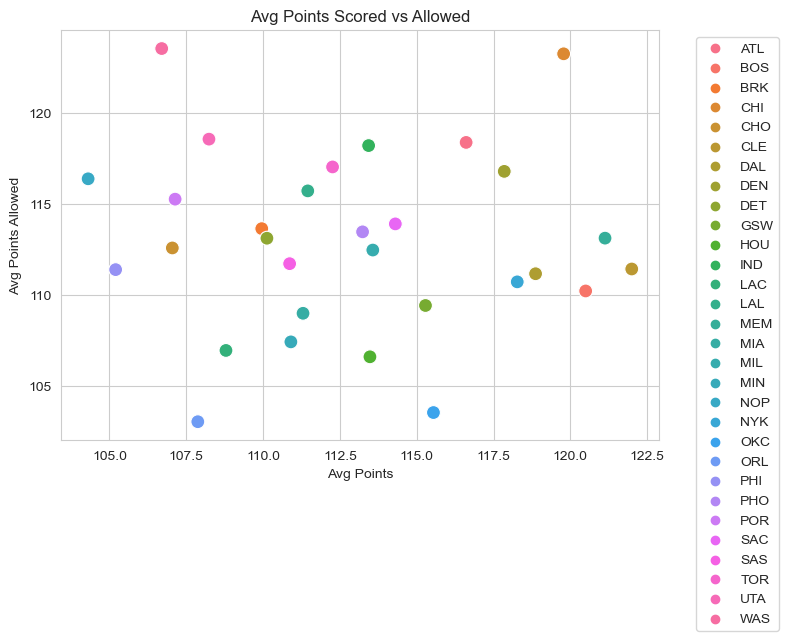

In [404]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pts_combo, x='PTS', y='PTS Allowed', hue='Tm', s=100)

plt.xlabel('Avg Points')
plt.ylabel('Avg Points Allowed')
plt.title('Avg Points Scored vs Allowed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [388]:
# Create one row per team per game using 'Tm', 'Data', 'Res'
team_games = df[['Tm', 'Data', 'Res']].drop_duplicates()

# Count how many times each team had each result
TR = team_games.groupby(['Tm', 'Res']).size().unstack(fill_value=0).reset_index()

TR['Total'] = TR['W'] + TR['L']
TR['Win_Perc'] = TR['W'] / TR['Total']

print(TR)

TR_sorted = TR.sort_values(by='Win_Perc', ascending=False)  # Sorts in descending order

# Apply background gradient
TR_sorted = TR_sorted.style.background_gradient(subset=['Win_Perc'], cmap='coolwarm')

# Display the styled DataFrame
TR_sorted

Res   Tm   L   W  Total  Win_Perc
0    ATL  11  12     23  0.521739
1    BOS   4  18     22  0.818182
2    BRK  13  10     23  0.434783
3    CHI  13  10     23  0.434783
4    CHO  16   6     22  0.272727
5    CLE   3  20     23  0.869565
6    DAL   8  15     23  0.652174
7    DEN   9  11     20  0.550000
8    DET  15   9     24  0.375000
9    GSW   8  13     21  0.619048
10   HOU   8  15     23  0.652174
11   IND  14   9     23  0.391304
12   LAC  10  14     24  0.583333
13   LAL  10  12     22  0.545455
14   MEM   8  15     23  0.652174
15   MIA  10  10     20  0.500000
16   MIL  10  11     21  0.523810
17   MIN  10  11     21  0.523810
18   NOP  18   5     23  0.217391
19   NYK   8  14     22  0.636364
20   OKC   5  17     22  0.772727
21   ORL   8  16     24  0.666667
22   PHI  15   5     20  0.250000
23   PHO   9  12     21  0.571429
24   POR  14   8     22  0.363636
25   SAC  13  10     23  0.434783
26   SAS  11  11     22  0.500000
27   TOR  16   7     23  0.304348
28   UTA  17  

Res,Tm,L,W,Total,Win_Perc
5,CLE,3,20,23,0.869565
1,BOS,4,18,22,0.818182
20,OKC,5,17,22,0.772727
21,ORL,8,16,24,0.666667
6,DAL,8,15,23,0.652174
14,MEM,8,15,23,0.652174
10,HOU,8,15,23,0.652174
19,NYK,8,14,22,0.636364
9,GSW,8,13,21,0.619048
12,LAC,10,14,24,0.583333


In [406]:
wp_pts = pd.merge(
    TR,
    team_statsavg,
    left_on='Tm',
    right_on='Tm',
)

print(wp_pts)

wp_pts_allowed = pd.merge(
    TR,
    opponent_statsavg,
    left_on='Tm',
    right_on='Opp',
    suffixes=('_team', '_opp')
)

print(wp_pts_allowed)


     Tm   L   W  Total  Win_Perc         PTS        AST        TRB        STL  \
0   ATL  11  12     23  0.521739  116.608696  29.739130  45.913043  10.217391   
1   BOS   4  18     22  0.818182  120.500000  25.636364  43.863636   7.545455   
2   BRK  13  10     23  0.434783  109.956522  25.869565  38.347826   6.869565   
3   CHI  13  10     23  0.434783  119.782609  29.217391  44.826087   7.043478   
4   CHO  16   6     22  0.272727  107.045455  23.045455  45.545455   7.681818   
5   CLE   3  20     23  0.869565  122.000000  28.217391  43.217391   9.130435   
6   DAL   8  15     23  0.652174  118.869565  25.869565  45.695652   8.217391   
7   DEN   9  11     20  0.550000  117.850000  30.100000  44.400000   8.700000   
8   DET  15   9     24  0.375000  110.125000  25.208333  45.458333   6.250000   
9   GSW   8  13     21  0.619048  115.285714  29.666667  49.190476   9.000000   
10  HOU   8  15     23  0.652174  113.478261  22.478261  49.913043   8.913043   
11  IND  14   9     23  0.39

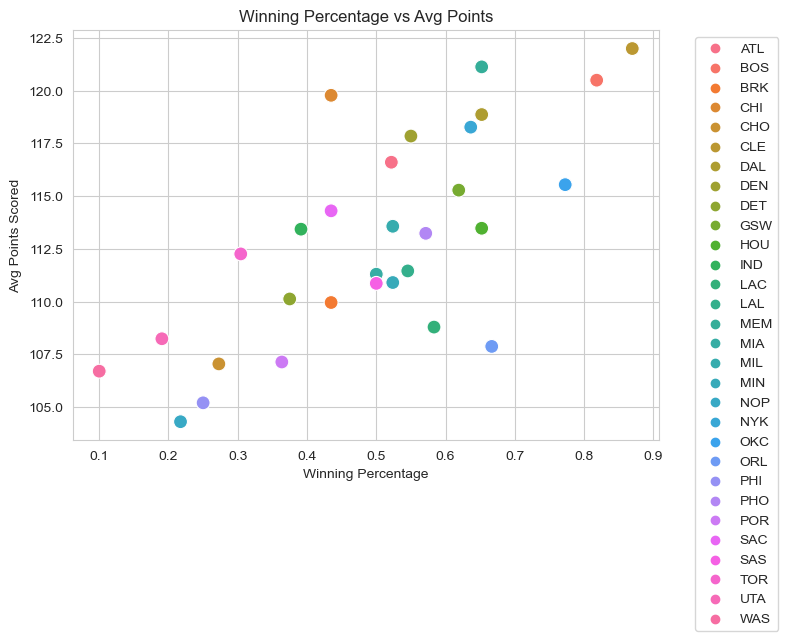

In [408]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wp_pts, x='Win_Perc', y='PTS', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Points Scored')
plt.title('Winning Percentage vs Avg Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

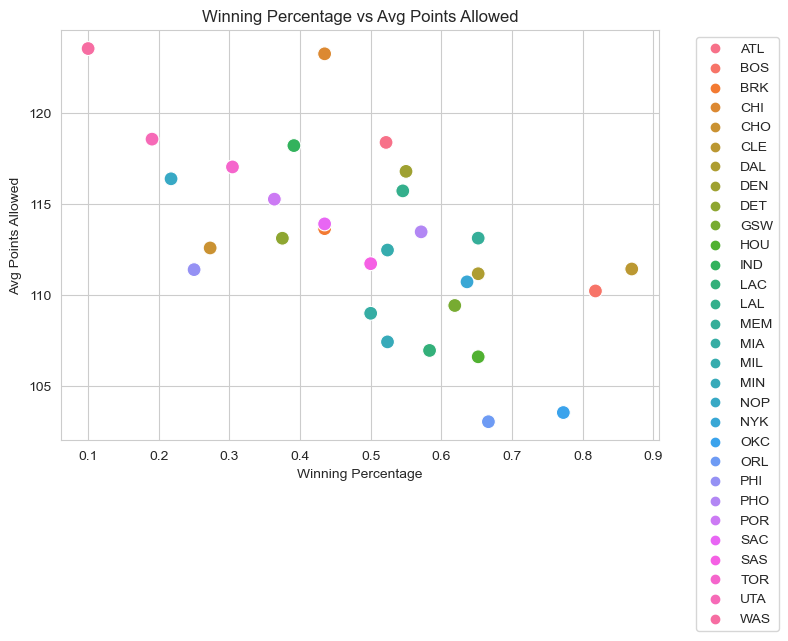

In [410]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wp_pts_allowed, x='Win_Perc', y='PTS Allowed', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Points Allowed')
plt.title('Winning Percentage vs Avg Points Allowed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

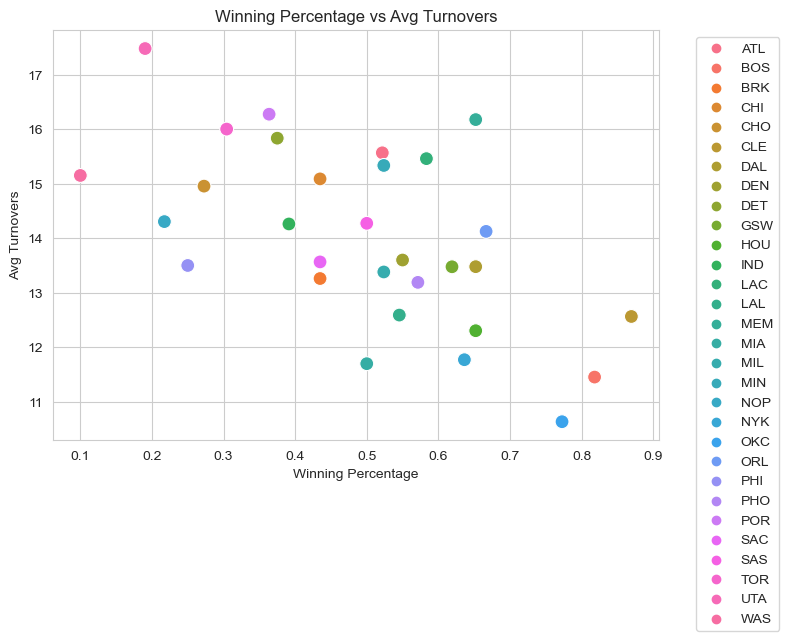

In [412]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wp_pts, x='Win_Perc', y='TOV', hue='Tm', s=100)

plt.xlabel('Winning Percentage')
plt.ylabel('Avg Turnovers')
plt.title('Winning Percentage vs Avg Turnovers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [416]:
# Filter Team data
team = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # or use 'max'/'min' if all are the same
}).reset_index()
print(team)

top_teams = team[team['Tm'].isin(['CLE','BOS', 'OKC'])]
print(top_teams)


      Tm        Data  PTS  AST  TRB  STL  BLK  TOV Res
0    ATL  2024-10-23  120   25   45   12    9   16   W
1    ATL  2024-10-25  125   25   39   11    9   13   W
2    ATL  2024-10-27  104   24   49    7    4   19   L
3    ATL  2024-10-28  119   32   39   12    7   16   L
4    ATL  2024-10-30  120   28   41   10    2   15   L
..   ...         ...  ...  ...  ...  ...  ...  ...  ..
659  WAS  2024-11-26  108   27   43    7    3   12   L
660  WAS  2024-11-27   96   21   40    9    4   20   L
661  WAS  2024-11-30  114   24   41    7    3   12   L
662  WAS  2024-12-03   87   18   52    4    8   20   L
663  WAS  2024-12-05  101   25   39   10    3   12   L

[664 rows x 9 columns]
      Tm        Data  PTS  AST  TRB  STL  BLK  TOV Res
23   BOS  2024-10-22  132   33   40    6    3    3   W
24   BOS  2024-10-24  122   21   49    7    3   14   W
25   BOS  2024-10-26  124   19   37   10    6   10   W
26   BOS  2024-10-28  119   24   38    5    5   12   W
27   BOS  2024-10-30  132   23   51   11 

      Tm       Data  PTS  AST  TRB  STL  BLK  TOV Res
23   BOS 2024-10-22  132   33   40    6    3    3   W
24   BOS 2024-10-24  122   21   49    7    3   14   W
25   BOS 2024-10-26  124   19   37   10    6   10   W
26   BOS 2024-10-28  119   24   38    5    5   12   W
27   BOS 2024-10-30  132   23   51   11    5   14   L
..   ...        ...  ...  ...  ...  ...  ...  ...  ..
463  OKC 2024-11-27  105   26   48   10    9   14   W
464  OKC 2024-11-29  101   20   47   12    3    9   W
465  OKC 2024-12-01  116   30   46    5    4    7   L
466  OKC 2024-12-03  133   32   34   18    3    8   W
467  OKC 2024-12-05  129   28   55   15   11    6   W

[67 rows x 9 columns]


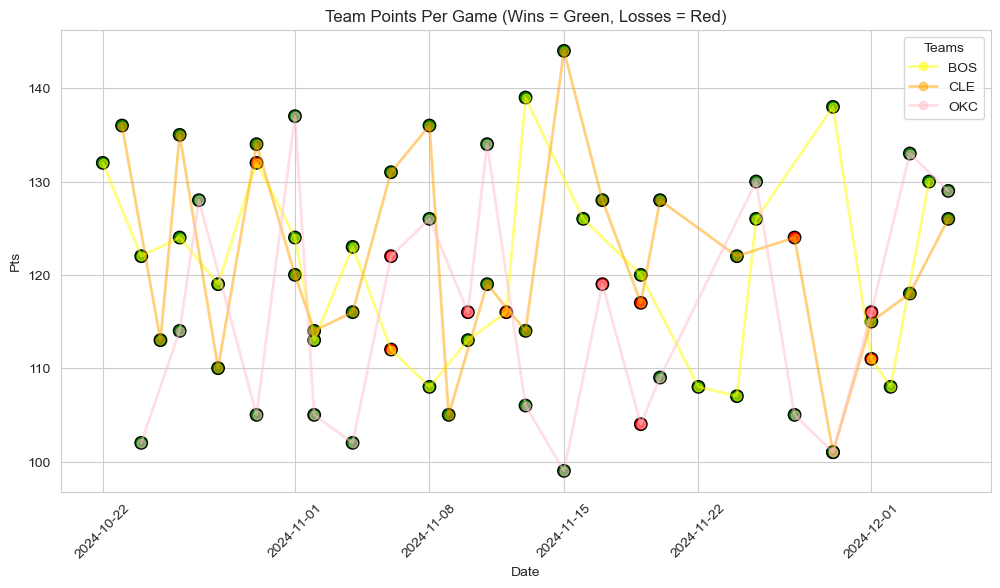

In [424]:
top_teams['Data'] = pd.to_datetime(top_teams['Data'])

# Sort data by Team and then Date
top_teams = top_teams.sort_values(by=['Tm', 'Data'])
print(top_teams)

# Set plot style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Loop through each team to create a separate line
teams = top_teams['Tm'].unique()
colors = cycle(['yellow', 'orange', 'pink'])  # Cycle through colors

for team, color in zip(teams, colors):
    team_data = top_teams[top_teams['Tm'] == team]  # Filter data for each team
    
    # Plot line for assists over time
    plt.plot(team_data['Data'], team_data['PTS'], color=color, label=team, marker='o', linewidth=2, linestyle='-', alpha=0.5)

    # Scatter plot to color-code wins/losses
    plt.scatter(
        team_data['Data'], team_data['PTS'], 
        c=team_data['Res'].map({'W': 'green', 'L': 'red'}),  # Map results to colors
        edgecolors='black', alpha=1, s=80  # Adjust size and border color for visibility
    )

# Labels and title
plt.xlabel("Date")
plt.ylabel("Pts")
plt.title("Team Points Per Game (Wins = Green, Losses = Red)")
plt.legend(title="Teams")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [466]:
# Filter Team data
opponent = df.groupby(['Opp', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # or use 'max'/'min' if all are the same
}).reset_index()

# Swap results: W becomes L, L becomes W
opponent['Res'] = opponent['Res'].replace({'W': 'L', 'L': 'W'})
opponent

,Opp,Data,PTS,AST,TRB,STL,BLK,TOV,Res
0,ATL,2024-10-23,116,21,43,8,6,17,W
1,ATL,2024-10-25,120,22,53,7,4,17,W
2,ATL,2024-10-27,128,26,45,13,12,10,L
3,ATL,2024-10-28,121,24,43,7,3,18,L
4,ATL,2024-10-30,133,32,37,10,5,14,L
...,...,...,...,...,...,...,...,...,...
659,WAS,2024-11-26,127,29,50,6,4,10,L
660,WAS,2024-11-27,121,27,47,18,4,13,L
661,WAS,2024-11-30,124,31,38,5,6,11,L
662,WAS,2024-12-03,118,31,45,11,4,11,L


In [502]:
# Swap results: W becomes L, L becomes W
opponent['Res'] = opponent['Res'].replace({'W': 'L', 'L': 'W'})
opponent

,Opp,Data,PTS,AST,TRB,STL,BLK,TOV,Res
0,ATL,2024-10-23,116,21,43,8,6,17,W
1,ATL,2024-10-25,120,22,53,7,4,17,W
2,ATL,2024-10-27,128,26,45,13,12,10,L
3,ATL,2024-10-28,121,24,43,7,3,18,L
4,ATL,2024-10-30,133,32,37,10,5,14,L
...,...,...,...,...,...,...,...,...,...
659,WAS,2024-11-26,127,29,50,6,4,10,L
660,WAS,2024-11-27,121,27,47,18,4,13,L
661,WAS,2024-11-30,124,31,38,5,6,11,L
662,WAS,2024-12-03,118,31,45,11,4,11,L


In [506]:
# Swap results: W becomes L, L becomes W
opponent['Res'] = opponent['Res'].replace({'W': 'L', 'L': 'W'})

allowed_115 = opponent[opponent['PTS'] > 115]
allowed_115


,Opp,Data,PTS,AST,TRB,STL,BLK,TOV,Res
0,ATL,2024-10-23,116,21,43,8,6,17,W
1,ATL,2024-10-25,120,22,53,7,4,17,W
2,ATL,2024-10-27,128,26,45,13,12,10,L
3,ATL,2024-10-28,121,24,43,7,3,18,L
4,ATL,2024-10-30,133,32,37,10,5,14,L
...,...,...,...,...,...,...,...,...,...
659,WAS,2024-11-26,127,29,50,6,4,10,L
660,WAS,2024-11-27,121,27,47,18,4,13,L
661,WAS,2024-11-30,124,31,38,5,6,11,L
662,WAS,2024-12-03,118,31,45,11,4,11,L


In [508]:
allowed_115['Res'].value_counts()

Res
L    207
W     83
Name: count, dtype: int64

In [512]:
res_counts = allowed_115['Res'].value_counts()
res_counts

Res
L    207
W     83
Name: count, dtype: int64

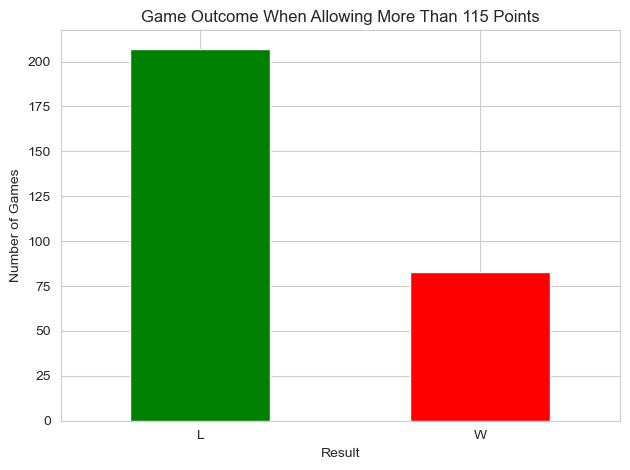

In [514]:
res_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Game Outcome When Allowing More Than 115 Points')
plt.xlabel('Result')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

     Opp       Data  PTS  AST  TRB  STL  BLK  TOV Res
23   BOS 2024-10-22  109   20   34    2    3   11   W
24   BOS 2024-10-24  102   27   40    9    6   13   W
25   BOS 2024-10-26  118   27   44    4    7   14   W
26   BOS 2024-10-28  108   18   43    7    6   16   W
27   BOS 2024-10-30  135   33   57   10    5   18   L
..   ...        ...  ...  ...  ...  ...  ...  ...  ..
463  OKC 2024-11-27  101   25   57    7    6   14   W
464  OKC 2024-11-29   93   25   47    4    6   17   W
465  OKC 2024-12-01  119   20   51    3    6   10   L
466  OKC 2024-12-03  106   21   36    3    6   29   W
467  OKC 2024-12-05   92   24   51    5    7   20   W

[67 rows x 9 columns]


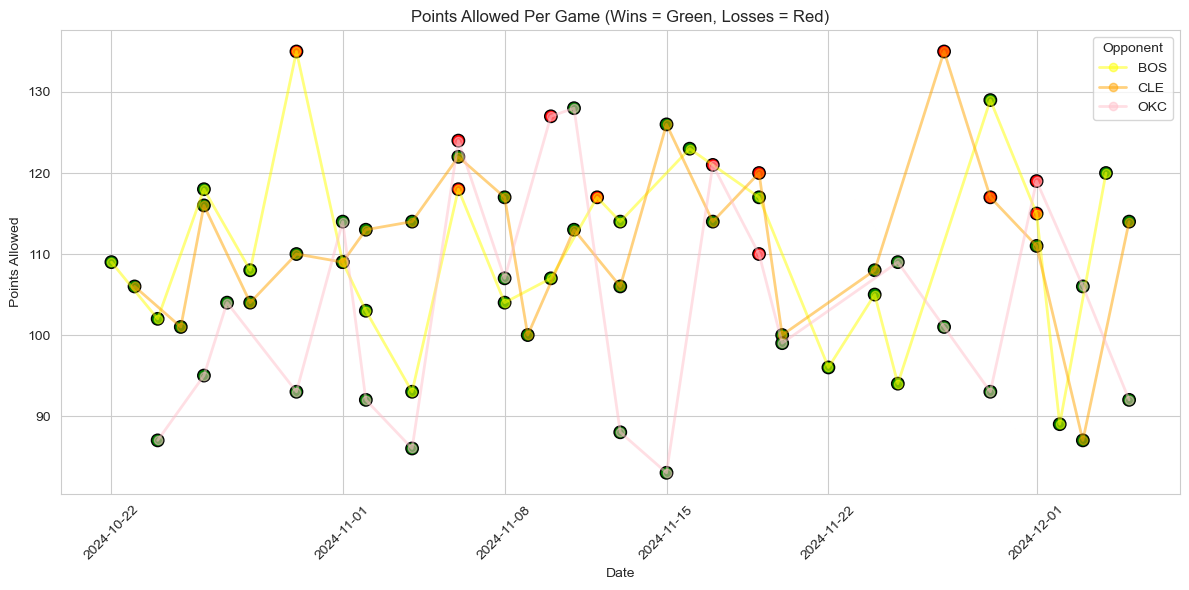

In [490]:
# top_opp = opponent[opponent['Opp'].isin(['CLE','BOS', 'OKC'])]
# print(top_opp)

# #try this for allowed
# top_opp['Data'] = pd.to_datetime(top_opp['Data'])

# # Sort data by Team and then Date
# top_opp = top_opp.sort_values(by=['Opp', 'Data'])

# # Set plot style
# sns.set_style("whitegrid")

# # Create the figure
# plt.figure(figsize=(12, 6))

# # Loop through each team to create a separate line
# opps = top_opp['Opp'].unique()
# colors = cycle(['yellow', 'orange', 'pink'])  # Cycle through colors

# for opp, color in zip(opps, colors):
#     team_data = top_opp[top_opp['Opp'] == opp]  # Filter data for each team
    
#     # Plot line for assists over time
#     plt.plot(team_data['Data'], team_data['PTS'], color=color, label=team, marker='o', linewidth=2, linestyle='-', alpha=0.5)

#     # Scatter plot to color-code wins/losses
#     plt.scatter(
#         team_data['Data'], team_data['PTS'], 
#         c=team_data['Res'].map({'W': 'green', 'L': 'red'}),  # Map results to colors
#         edgecolors='black', alpha=1, s=80  # Adjust size and border color for visibility
#     )

# # Labels and title
# plt.xlabel("Date")
# plt.ylabel("Pts")
# plt.title("Team Points Allowed Per Game (Wins = Green, Losses = Red)")
# plt.legend(title="Teams")
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()


# # Filter top opponents
# top_opp = opponent[opponent['Opp'].isin(['CLE', 'BOS', 'OKC'])].copy()

# # Convert date column safely
# top_opp.loc[:, 'Data'] = pd.to_datetime(top_opp['Data'])

# # Sort data
# top_opp = top_opp.sort_values(by=['Opp', 'Data'])
# print(top_opp)

# # Get list of teams
# opps = top_opp['Opp'].unique()
# colors = cycle(['yellow', 'orange', 'pink'])

# # Plot setup
# sns.set_style("whitegrid")
# plt.figure(figsize=(12, 6))

# # Plot for each team
# for opp, color in zip(opps, colors):
#     opp_data = top_opp[top_opp['Opp'] == opp]
    
#     plt.plot(opp_data['Data'], opp_data['PTS'], color=color, label=team,
#              marker='o', linewidth=2, linestyle='-', alpha=0.5)

#     plt.scatter(
#         opp_data['Data'], opp_data['PTS'],
#         c=opp_data['Res'].map({'W': 'green', 'L': 'red'}),
#         edgecolors='black', alpha=1, s=80
#     )

# # Final touches
# plt.xlabel("Date")
# plt.ylabel("Points Allowed")
# plt.title("Team Points Allowed Per Game (Wins = Green, Losses = Red)")
# plt.xticks(rotation=45)
# plt.legend(title="Opponent")
# plt.tight_layout()
# plt.show()






# Filter top opponents
top_opp = opponent[opponent['Opp'].isin(['CLE', 'BOS', 'OKC'])].copy()

# Convert date column
top_opp['Data'] = pd.to_datetime(top_opp['Data'])

# Sort data
top_opp = top_opp.sort_values(by=['Opp', 'Data'])
print(top_opp)

# Get list of opponent teams (the ones we want to analyze defensively)
opps = top_opp['Opp'].unique()
colors = cycle(['yellow', 'orange', 'pink'])

# Plot setup
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Loop through each opponent to plot their allowed points
for opp, color in zip(opps, colors):
    team_data = top_opp[top_opp['Opp'] == opp]

    plt.plot(team_data['Data'], team_data['PTS'], color=color, label=opp,
             marker='o', linewidth=2, linestyle='-', alpha=0.5)

    plt.scatter(
        team_data['Data'], team_data['PTS'],
        c=team_data['Res'].map({'W': 'green', 'L': 'red'}),
        edgecolors='black', alpha=1, s=80
    )

plt.xlabel("Date")
plt.ylabel("Points Allowed")
plt.title("Points Allowed Per Game (Wins = Green, Losses = Red)")
plt.xticks(rotation=45)
plt.legend(title="Opponent")
plt.tight_layout()
plt.show()

In [483]:
# Step 1: Group by Team, Player, and Game to aggregate raw stats
team_player = df.groupby(['Tm', 'Player', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # carry over game result
}).reset_index()

# Step 2: Group by Team, Player, and Result to get per-result averages
team_playeravg = team_player.groupby(['Tm', 'Player', 'Res']).mean(numeric_only=True).reset_index()
print(team_playeravg)

cle = team_playeravg[team_playeravg['Tm'] == 'CLE']

      Tm             Player Res        PTS       AST        TRB       STL  \
0    ATL  Bogdan Bogdanović   L  13.333333  2.000000   3.666667  0.666667   
1    ATL  Bogdan Bogdanović   W  10.666667  2.333333   3.333333  1.333333   
2    ATL       Clint Capela   L  11.818182  1.636364   8.090909  0.454545   
3    ATL       Clint Capela   W   9.250000  1.166667  10.833333  0.916667   
4    ATL        David Roddy   L   7.500000  1.875000   4.250000  0.750000   
..   ...                ...  ..        ...       ...        ...       ...   
932  WAS      Marvin Bagley   L   4.500000  0.250000   2.666667  0.333333   
933  WAS      Marvin Bagley   W   2.000000  0.000000   1.500000  0.000000   
934  WAS    Patrick Baldwin   L   2.300000  0.100000   1.200000  0.200000   
935  WAS    Patrick Baldwin   W   2.000000  0.000000   0.000000  0.000000   
936  WAS     Richaun Holmes   L   4.000000  0.000000   1.666667  0.000000   

          BLK       TOV  
0    0.000000  2.666667  
1    0.500000  1.166667

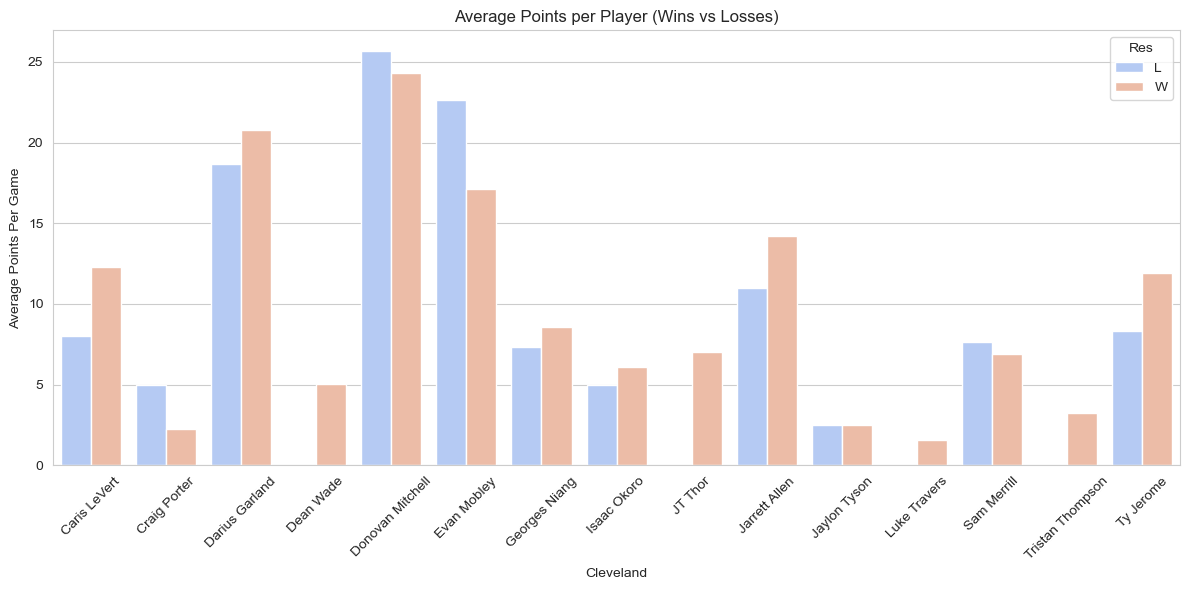

In [446]:
#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cle, x='Player', y='PTS', hue='Res', palette='coolwarm')

# Formatting
plt.title("Average Points per Player (Wins vs Losses)")
plt.xlabel("Cleveland")
plt.ylabel("Average Points Per Game")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

       Tm             Player        Data  PTS  AST  TRB  STL  BLK  TOV Res
0     ATL  Bogdan Bogdanović  2024-10-23    8    2    2    0    2    2   W
1     ATL  Bogdan Bogdanović  2024-11-18    6    3    3    0    0    0   W
2     ATL  Bogdan Bogdanović  2024-11-20    6    1    7    0    0    5   L
3     ATL  Bogdan Bogdanović  2024-11-22   16    4    1    1    0    1   L
4     ATL  Bogdan Bogdanović  2024-11-25   18    1    3    1    0    2   L
...   ...                ...         ...  ...  ...  ...  ...  ...  ...  ..
7216  WAS    Patrick Baldwin  2024-11-26    3    0    0    0    1    0   L
7217  WAS    Patrick Baldwin  2024-11-27    3    0    4    0    0    1   L
7218  WAS     Richaun Holmes  2024-11-02    0    0    0    0    0    0   L
7219  WAS     Richaun Holmes  2024-11-08    6    0    2    0    0    0   L
7220  WAS     Richaun Holmes  2024-12-03    6    0    3    0    2    2   L

[7221 rows x 10 columns]
      Tm        Data  PTS  AST  TRB  STL  BLK  TOV Res
0    ATL  2024-10-2

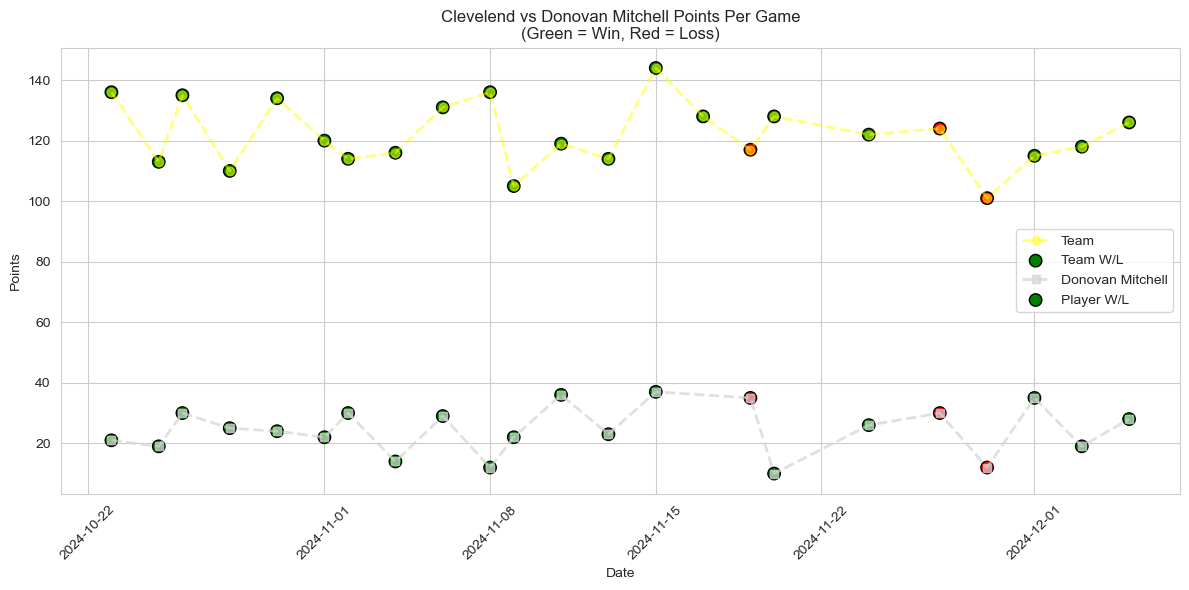

In [648]:
# Step 1: Group by Team, Player, and Game to aggregate raw stats
team_player = df.groupby(['Tm', 'Player', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # carry over game result
}).reset_index()
print(team_player)

team_total = df.groupby(['Tm', 'Data']).agg({
    'PTS': 'sum',
    'AST': 'sum',
    'TRB': 'sum',
    'STL': 'sum',
    'BLK': 'sum',
    'TOV': 'sum',
    'Res': 'first'  # carry over game result
}).reset_index()
print(team_total)

team_cle = team_total[team_total['Tm'] == 'CLE'].copy()
mitchell = team_player[team_player['Player'] == 'Donovan Mitchell'].copy()

#try this for allowed
team_cle['Data'] = pd.to_datetime(team_cle['Data'])
mitchell['Data'] = pd.to_datetime(mitchell['Data'])

# Sort data by Team and then Date
team_cle = team_cle.sort_values(by=['Tm', 'Data'])
mitchell = mitchell.sort_values(by=['Player', 'Data'])

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# --- TEAM LINE ---
plt.plot(
    team_cle['Data'], team_cle['PTS'],
    label='Team', color='yellow', marker='o', linestyle='--', linewidth=2, alpha=0.5
)
plt.scatter(
    team_cle['Data'], team_cle['PTS'],
    c=team_cle['Res'].map({'W': 'green', 'L': 'red'}),
    edgecolors='black', s=80, label='Team W/L'
)

# --- PLAYER LINE ---
plt.plot(
    mitchell['Data'], mitchell['PTS'],
    label=mitchell['Player'].iloc[0], color='lightgrey', marker='s', linestyle='--', linewidth=2, alpha=0.7
)
plt.scatter(
   mitchell['Data'], mitchell['PTS'],
    c=mitchell['Res'].map({'W': 'green', 'L': 'red'}),
    edgecolors='black', s=80, label='Player W/L'
)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Points")
plt.title("Clevelend vs Donovan Mitchell Points Per Game\n(Green = Win, Red = Loss)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [498]:
df

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,Precious Achiuwa,NYK,CHO,W,12.25,1,4,0.250,0,1,...,2,4,1,0,0,2,2,2,-1.3,2024-12-05
7217,Jericho Sims,NYK,CHO,W,3.37,0,1,0.000,0,0,...,1,1,0,0,0,1,0,0,-1.4,2024-12-05
7218,Chris Duarte,CHI,SAS,W,4.27,0,1,0.000,0,1,...,0,0,0,0,0,0,2,0,-1.5,2024-12-05
7219,Jamal Shead,TOR,OKC,L,11.90,0,4,0.000,0,4,...,1,1,2,0,0,1,0,0,-2.1,2024-12-05
